# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-знакомство-с-данными" data-toc-modified-id="Загрузка-и-знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и знакомство с данными</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-пропусков" data-toc-modified-id="Удаление-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Удаление пропусков</a></span></li><li><span><a href="#Удаление-неявных-дубликатов" data-toc-modified-id="Удаление-неявных-дубликатов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Удаление неявных дубликатов</a></span></li><li><span><a href="#Преобразование-типов-данных" data-toc-modified-id="Преобразование-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Преобразование типов данных</a></span></li></ul></li><li><span><a href="#Добавление-дополнительных-столбцов" data-toc-modified-id="Добавление-дополнительных-столбцов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Добавление дополнительных столбцов</a></span><ul class="toc-item"><li><span><a href="#YEAR_EXPOSITION" data-toc-modified-id="YEAR_EXPOSITION-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>YEAR_EXPOSITION</a></span></li><li><span><a href="#MONTH_EXPOSITION" data-toc-modified-id="MONTH_EXPOSITION-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>MONTH_EXPOSITION</a></span></li><li><span><a href="#DAY_EXPOSITION" data-toc-modified-id="DAY_EXPOSITION-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>DAY_EXPOSITION</a></span></li><li><span><a href="#FLOOR_TYPE" data-toc-modified-id="FLOOR_TYPE-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>FLOOR_TYPE</a></span></li><li><span><a href="#PRICE_SQUARE_METER" data-toc-modified-id="PRICE_SQUARE_METER-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>PRICE_SQUARE_METER</a></span></li><li><span><a href="#CITY_CENTERS_NEAREST_KM" data-toc-modified-id="CITY_CENTERS_NEAREST_KM-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>CITY_CENTERS_NEAREST_KM</a></span></li><li><span><a href="#FORMATTED_PRICE" data-toc-modified-id="FORMATTED_PRICE-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>FORMATTED_PRICE</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследование-параметров-объектов-недвижимости" data-toc-modified-id="Исследование-параметров-объектов-недвижимости-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Исследование параметров объектов недвижимости</a></span></li><li><span><a href="#Срок-продажи-квартир" data-toc-modified-id="Срок-продажи-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Срок продажи квартир</a></span></li><li><span><a href="#Факторы-вляющие-на-стоимость-объекта" data-toc-modified-id="Факторы-вляющие-на-стоимость-объекта-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Факторы вляющие на стоимость объекта</a></span></li><li><span><a href="#Стоимость-1-квадратного-метра" data-toc-modified-id="Стоимость-1-квадратного-метра-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Стоимость 1 квадратного метра</a></span></li><li><span><a href="#Расстояние-до-центра" data-toc-modified-id="Расстояние-до-центра-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Расстояние до центра</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

***Цель проекта***   
Построить систему которая сможет формировать стоимость квартир на основе имеющихся данных. Это поможет собственникам и риэлторам более точно оценивать стоимость недвижимости и выявлять возможные аномалии в ценах, что в свою очередь может снизить риски мошенничества на рынке недвижимости. 

***Задачи проекта***   
1. Провести предварительный анализ данных для понимания структуры и полноты данных.
2. Обработать и очистить данные от выбросов и недостающих значений, чтобы обеспечить корректность последующих анализов.
3. Провести исследовательский анализ данных для определения ключевых факторов, влияющих на цену квартир. 
4. Подготовить рекомендации для заказчика на основании проведенного анализа.


***Описание данныx***  
Исследование проводится на наборе данных о продаже квартир сервиса Яндекс Недвижимость. Датасет содержит следующие данные на основании которых и будет проводится анализ:  

* этаж (floor);  
* цена на момент снятия с публикации (last_price);  
* свободная планировка (open_plan);  
* число комнат (rooms);  
* квартира-студия (studio);  
* общая площадь квартиры в квадратных метрах (total_area);
* число фотографий квартиры в объявлении (total_images);
* высота потолков (ceiling_height);
* количество этажей в доме (floors_total);
* жилая площадь (living_area);
* является ли квартира апартаментами (is_apartment);
* площадь кухни (kitchen_area);
* число балконов (balcony);
* название населённого пункта (locality_name);
* расстояние до ближайшего аэропорта (airports_nearest);
* расстояние до центра города (cityCenters_nearest);
* число парков в радиусе 3 км (parks_around3000);
* расстояние до ближайшего парка (parks_nearest);
* расстояние до ближайшего водоёма (ponds_nearest);
* число водоёмов в радиусе 3 км (ponds_around3000);
* расстояние до ближайшего водоёма (ponds_nearest);
* сколько дней было размещено объявление, от публикации до снятия (days_exposition).

### Загрузка и знакомство с данными

*Импортируем библиотеку Pandas*

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.head(5))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

*Выведем основную информацию о датафрейме с помощью метода info().*

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

*Построим гистограмму для всех числовых столбцов нашего датафрейма перед началом работы с данными. Перед этим испортируем библиотеки matplotlib и seaborn.*

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

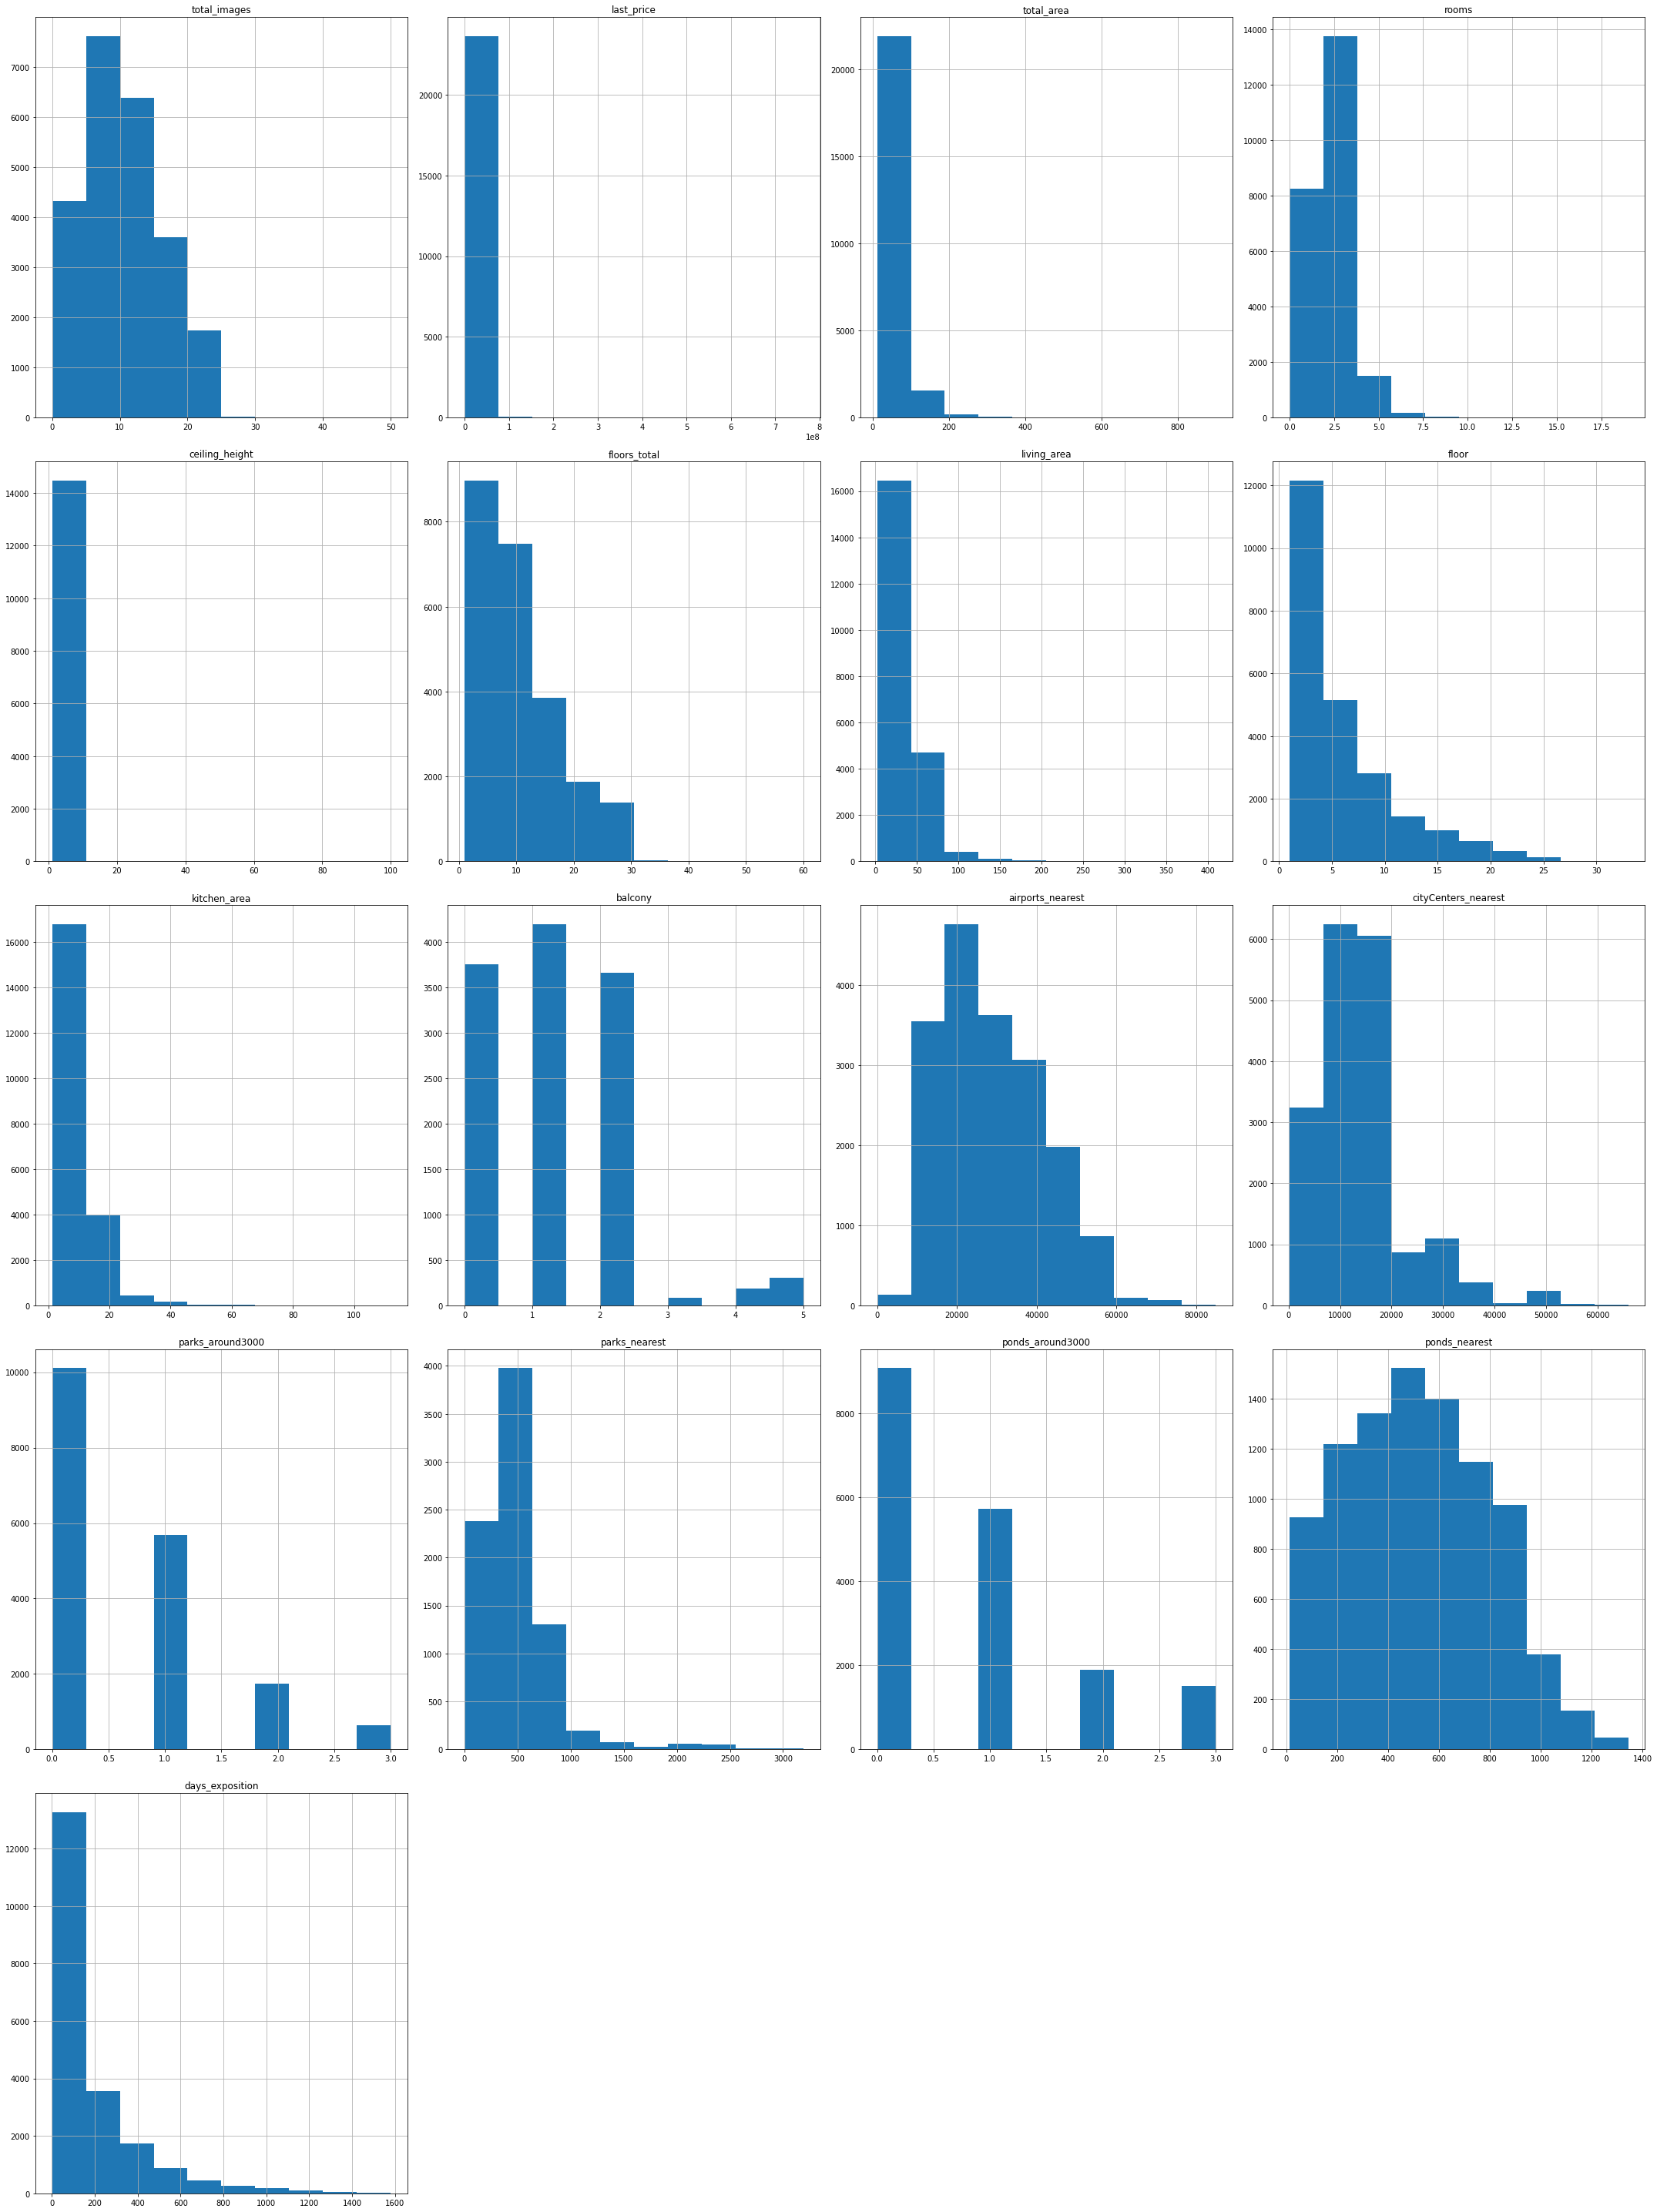

In [5]:
data.hist(figsize=(30, 40))
plt.tight_layout()
plt.show()

Посмотрим на полученные гистограммы числовых данных:  
- некоторые показатели имеют очень широкий диапазон значений, что говорит о некорректности данных или же наборе данных с очень отличающимися параметрами;  
- распределение данных на графиках разного характера, большие промежутки или пустые области, это может указать на недостаточность данных или неравномерное распределение по выборке;  
- некоторые из графиков указывают на наличие выбросов – точек, которые сильно удалены от общего распределения - это говорит о том, что возможно потребуется дальнейшая обработка, например, их удаление или преобразование.


### Предобработка данных

####  Удаление пропусков ####

*Выведем количество пропущенных значений для каждого столбца.*

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

None


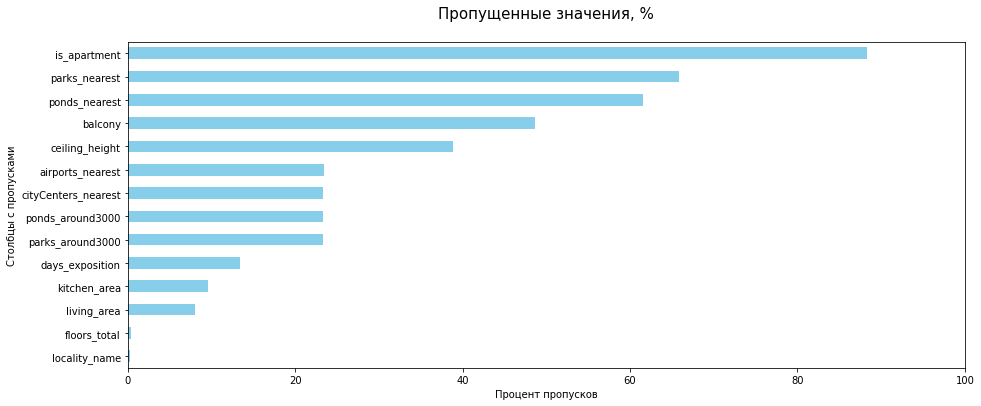

In [7]:
def pass_value_barh(data):
    try:
        (
            (data.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (15,6), legend = False, color = 'skyblue')               

        );
        plt.title('Пропущенные значения, %' + "\n", fontsize=15)
        plt.xlabel('Процент пропусков', fontsize=10)
        plt.ylabel('Столбцы с пропусками',fontsize=10)
        plt.xlim(0, 100)  
    except:
        print('пропусков нет или произошла ошибка ')
        
print(pass_value_barh(data))

**Пропуски обнаружены в следующих параметрах:**

* высота потолков **(ceiling_height)**;  
*количество этажей в доме **(floors_total)**;  
*жилая площадь **(living_area)**;  
*является ли квартира апартаментами **(is_apartment)**;  
*площадь кухни **(kitchen_area)**;  
*число балконов **(balcony)**;  
*название населённого пункта **(locality_name)**;  
*расстояние до ближайшего аэропорта **(airports_nearest)**;  
*расстояние до центра города **(cityCenters_nearest)**;  
*число парков в радиусе 3 км **(parks_around3000)**;  
*расстояние до ближайшего парка **(parks_nearest)**;  
*расстояние до ближайшего водоёма **(ponds_nearest)**;  
*число водоёмов в радиусе 3 км **(ponds_around3000)**;  
*расстояние до ближайшего водоёма **(ponds_nearest)**;  
*сколько дней было размещено объявление, от публикации до снятия **(days_exposition)**.

*Удалим пропуски там, где это возможно. В столбце с данными о количестве балконов - скорее всего отсутствуют значения в тех квартирах, где их нет - поэтому пропуски можем заполнить значением 0. Веротянее всего, что пропуски обусловлены человеческим фактором и в случае отсутствия параметра данные просто не заполнялись.  
Также можно поступить с параметрами количества парков и водоемов в радиусе 3 километров. Данные были внесены автоматически на основании картографических данных. Несомненно, наличие парков и водоемов плюс для квартиры и при их наличии они были бы указаны в датасете.*

In [8]:
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

*Так же есть пропуски в данных о местонахождении недвижимости (locality_name), относительно общего числа данных таких квартир не много - всего 49 объектов, поэтому удалим эти строки из таблицы. Пропуски скорее всего связаны с человечским фактором*

In [9]:
data = data.dropna(subset=['locality_name'])

*Также отсутствуют данные о высоте домов floors_total. Таких пропусков не много относительно общего количества данных, избавимся от строк с пропусками в этом столбце. Вероятно для человека заполнявшего информаию этот фактор не сильно важен и данные просто не были заполнены.*

In [10]:
data = data.dropna(subset=['floors_total'])

*Пропуски в столбцу is_apartment вероятнее всего свидетельствуют о том, что объект не является апартаментами. Столбец имеет 2 параметра True или False, поэтому все пропуски заполним значением False.*

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False)

*Пропусков в столбце days_exposition удалять не будем, логично предположить, что пропуски в данном стобце говорят о том, что квартира все еще находится на этапе продажи и поэтому дата продажи отсутствует или же была снята с продажи и поэтому информация заполнена не была.*

*Теперь заполним пропуски в столбце living_area и kitchen_area. У нас есть столбец total_area - в котором указаны все значения, из которого можно вычесть один параметр и получить другой. Но с учетом большого количества пропусков могут быть строки, где пропуски есть в обеих переменных. Посмотрим сколько их:*

In [12]:
print(data[(data['kitchen_area'].isnull()) & (data['living_area'].isnull())].shape[0])

1427


*Это большой объем пропущенных данных, поэтому удалять оставшиеся пропущенные значения из датафрейма не стоит - это приветем к потере большого числа данных.*  

*Для заполнения пропущенных значений в столбцах жилая площадь (living_area) и площадь кухни (kitchen_area) найдем медианное значение какой процент занимает площадь кухни и жилая площадь от общего метража объектов и округлим до 2х знаков после запятой.*  

In [13]:
living_area_percent = data['living_area']/data['total_area'] * 100
kitchen_area_percent = data['kitchen_area']/data['total_area'] * 100

living_area_median = living_area_percent.median().round(2)
kitchen_area_median = kitchen_area_percent.median().round(2)

print('Медианный процент жилой площади:', living_area_median)
print('Медианный процент площади кухни:', kitchen_area_median)

Медианный процент жилой площади: 56.82
Медианный процент площади кухни: 17.24


*Теперь заполним пустые ячейки в столбцах площади кухни (kitchen_area) и жилой площади (living_area) рассчитав значение относительно общей площади (total_area) по медианному проценту*.

In [14]:
data['kitchen_area'] = data['kitchen_area'].fillna((kitchen_area_median / 100) * data['total_area']).round(2)
data['living_area'] = data['living_area'].fillna((living_area_median / 100) * data['total_area']).round(2)

In [15]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,90.34,9,False,...,27.41,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,0.0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,40.68,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,0.0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


*Пропущенных значений стало меньше. Удалены из датафрейма 134 строки. Наше ограничение в 10% это 2369 строк. Пока все в порядке.***

####  Удаление неявных дубликатов ####

*Вернемся к столбцу locality_name, с наваниями населенных пунктов и посмотрим количество уникальных значений в этом столбце, а также сами значения на предмет неявных дубликатов.*

In [16]:
print('Количество уникальных названий столбца locality_name:', len(data['locality_name'].unique()))
print()
print(data['locality_name'].unique())

Количество уникальных названий столбца locality_name: 364

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Н

*Обработаем неявные дубликаты в столбце locality_name. В этом столбце есть одни и те же значения, но записанные по-разному: например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Приведем их к одинаковому значению.*

In [17]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок городского типа', 'посёлок', 'городской поселок', 'коттеджный поселок', 'поселок станции'], 'поселок', regex=True)
) 

*До преобразования в столбце locality_name у нас было 364 уникальных значения. После удаления неявых дубликатов:*

In [18]:
print('Количество уникальных названий столбца locality_name после удаления неявных дубликатов:',len(data['locality_name'].unique()))


Количество уникальных названий столбца locality_name после удаления неявных дубликатов: 320


*В датасете также могут быть строки-дубликаты, от которых необходимо избавится перед анализом, проверим наличие:*

In [19]:
data.duplicated().sum()

0

*Явных дубликатов в датасете нет, можно продолжать предобработку данных.*

*Посмотрим как изменилось количество пропусков после преобразований*

#### Преобразование типов данных #### 

*Сначала изменим тип данных в параметрах balcony, parks_around3000, ponds_around3000, floors_total все 
это целочисленные параметры и знаков после запятой не ожидается. Преобразование типа данных в дальнейшем упростит операции с этими данными и их визуальзацию.*

In [20]:
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['floors_total'] = data['floors_total'].astype(int)

*В данных об апартаментах (is_apartment) мы имеем 2 значения - True и False, изменим тип данных в этом столбце на bool. Это упростит дальнейшие операции со значениями данного столбца.*

In [21]:
data['is_apartment'] = data['is_apartment'].astype(bool)

*В столбце с датой начала продажи квартиры изменим тип данных с вещественного на datetime64. Это упростит дальнейшие операции с данными этого столбца, например извлечение дня, месяца, года в отдельное значение.*

In [22]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

*В столбце locality_name изменим тип данных с object на category. Это может быть полезно в дальнейшем при анализе влияния расположения квартиры на скорость продажи и стоимость.*

In [23]:
data['locality_name'] = data['locality_name'].astype('category')

### Добавление дополнительных столбцов

#### YEAR_EXPOSITION ####  
*Добавим в таблице несколько новых столбцов для удобства дальнейшего анализа. Для начала выведем столбец с годом публикации объвления и передадим ему название year_exposition.*

In [24]:
data['year_exposition'] = data['first_day_exposition'].dt.year

#### MONTH_EXPOSITION ####
*Теперь добавим столбец в котором будет указан месяц публикации и назовем его по аналогии month_exposition.*

In [25]:
data['month_exposition'] = data['first_day_exposition'].dt.month

#### DAY_EXPOSITION #### 
*Создадим столбец с указанием дня публикации в числовом эквиваленте, где 0 - это понедельник, 6 - воскресенье.*

In [26]:
data['day_exposition'] = data['first_day_exposition'].dt.weekday

#### FLOOR_TYPE ####  
*Зачастую при выборе квартиры смотрят не столько на сам этаж, а исключают или указывают первый или последний. Например, в случае покупки жилья для пожилого человека или на случай поломки лифта, если семья с маленьким ребенком и понадобится спускать коляску для прогулок. Создадим столбец который будет указывать тип этажа и присвоим ему название floor_type. В котором будут значения типа: первый, последний или другой.*

In [27]:
data['floor_type'] = data.apply(lambda row: 'первый' if row['floor'] == 1 else ('последний' if row['floor'] == row['floors_total'] else 'другой'), axis=1)

#### PRICE_SQUARE_METER ####
*Рассчитаем стоимость квадратного метра для каждого объекта и добавим показатель в новый столбец price_square_meter, округлив значения после запятой до двух знаков.*

In [28]:
data['price_square_meter'] = (data['last_price'] / data['total_area']).round(2)

#### CITY_CENTERS_NEAREST_KM ####  
*В исходной таблице есть столбец с указанием расстояния до центра города, но указан параметр в метрах, что не очень удобно, поэтому создадим столбец city_сenters_nearest_km где укажем значение в километрах и округлим до ближайших целых значений.* Но перед эти переименуем его в корректный вид.

In [29]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

In [30]:
data['city_сenters_nearest_km'] = (data['city_centers_nearest'] / 1000).round()

#### FORMATTED_PRICE ####  

*В датафрейме есть стобец с уазанием стоимости объекта в миллионах рублей, c большим разбросом цен от 430 тысяч до 400 000 000 рублей. В дальнейшем работе такие обозначения будут не удобны при построении графиков и рассмотрении показателей. Поэтому добавим еще один столбец formatted_price где разделим все цены на 1 000 000*

In [31]:
data['formatted_price'] = (data['last_price'] / 1_000_000).round(1).astype(float)

***Промежуточный вывод:*** 
На этапе предобработки данных были выявлены отсутствующие значения различных параметров. Для уменьшения их доли в наборе данных применялись различные приемы в зависимости от типа данных:  
- в параметрах количеств балконов, а также парках и прудах в радиусе 3 км. Вероятнее всего что отсутствие данных обусловлено отсутствием этих папарметрах у объекта, ввиду чего пустые ячейки изменны на нелучвое значение;  
- в параметрах общее количество этажей и название населенного пункта обнаружено неольшое количество пропусков, относительно общего объема данных и ввиду невозможности заполнения таких пропусков достоверно с помощью каких-либо операций строки с пропусками в этих параметрах были удалены;   
- в параметре is_apartment также обнаружены пропуски и так как этот параметр заполнялся не автоматически,  предлагается что в случае не соответствия объекта критерию - аппартаменты в ячейке оставлялся пропуск. Заполнили пустые ячейки значением False;  
- пропуски в столбцах living_area и kitchen_area. В заполнении попусков у этих столбцов использовалось медианное значение соотношения жилой площади и площади кухни относительно общей площади объекта, таким образом все пропуски в данных были заполнены.  

Помимо отсутствующих значений были обнаружены неявные дубликаты в параметре с названием населенных пунктов в которых расположены объекты, путем приведения некоторых названий в одинаковому значению снижено количество уникальных названий с 364 до 320.  

Также оптимизирован тип данных некоторых столбцов для упрощения операций с данными на дальнейших шагах исследования:  
- в параметрах balcony, parks_around3000, ponds_around3000, floors_total данные приведены к целочисленному типу;  
- в данных об апартаментах (is_apartment) мы имеем 2 значения - True и False, поэтому изменили тип данных на bool; 
- в столбце с датой начала продажи квартиры изменим тип данных с вещественного на datetime64; 
- в столбце locality_name изменим тип данных с object (строка) на category.  

Для удобства в дальнейшем проведении анализа были добавлены новые столбца в датасет:  
- день, месяц и год публикации объеявления выведены в отдельные столбцы;  
- добавлен столбец с типом этажа со значениями: первый, последний или другой;  
- добавлен столбец со стоимость 1 кв. м. исходя из стоимости объекта и его общей площади;  
- добавлен столбец с удаленность от центра города в километрах, для проведения анализа влияния дальности от центра на стоимость квартиры;  
- добавлен столбец со стоимость объекта в млн. руб., что позволит визуально облегчить восприятие цены на графиках.

### Исследовательский анализ данных

#### Исследование параметров объектов недвижимости ####

На первом этапе исследования мы рассмотрим параметры представленные в датасете на предмет аномалий, редких и выбивающихся значений. Если природа появления аномальных значений понятна, постараемся восстановить корректные значения, если же восстановить корректные данные нельзя - удалим их. После этого построим гистограмму для каждого из параметров и выведем численное описание данных - что позволит сделать промежуточные выводы в процессе исследования. Фильтрацию по каждому параметру мы будем выполнять в исходном датасете, чтобы потом работать c одним датасетом и на каждом этапе проверять какой объем данных мы удалили после фильтрации.

* ***Общая площадь (total_area)***

*Построим диаграмму размаха, визуально мы сможем понять присутствуют ли аномальные значения в данном столбце.*

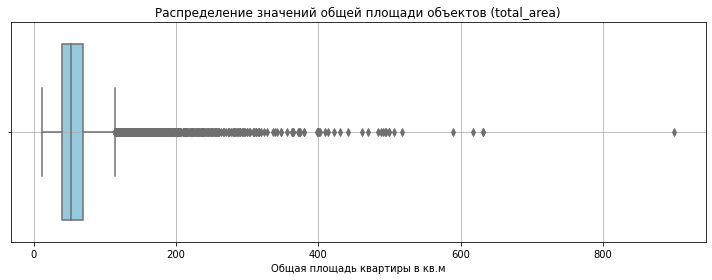

In [32]:
plt.figure(figsize= (10, 4))
sns.boxplot(x=data['total_area'], color='skyblue')
plt.title('Распределение значений общей площади объектов (total_area)')
plt.xlabel('Общая площадь квартиры в кв.м')
plt.grid(True)
plt.tight_layout()
plt.show()

*Аномальные значения явно присутствуют - визуально только справа от межквартильного размаха. Их достаточно много. Если удалить все данные за рамками межквартильного размаха мы потеряем много данных поэтому посмотрим на самые большие и самые маленькие значения и удалим те, что реже всего встречаются в выборке.*  

*Выведем минимальные площади квартир:*

In [33]:
print(data['total_area'].sort_values(ascending=True).head(30))

19904    12.00
17961    13.00
19546    13.00
19807    13.00
19558    13.20
19642    14.00
12040    15.00
16949    15.00
8886     15.50
9412     16.00
10208    17.00
716      17.00
22356    17.20
9157     17.60
21802    17.78
12996    18.00
20714    18.00
6084     18.00
19311    18.00
4542     18.00
8729     18.40
12881    18.50
8755     18.80
23191    18.90
9817     19.00
8454     19.00
5855     19.50
17860    20.00
21419    20.00
10964    20.00
Name: total_area, dtype: float64


*Показатели до 16 кв.м. достаточно редкие, поэтому оставим только те объекты где площадь больше или равна 17 кв.м. и посмотрим на значения самых крупных объектов в датафрейме по общей площади*

In [34]:
print(data['total_area'].sort_values(ascending=False).head(30))

19540    900.00
12859    631.20
3117     631.00
15651    618.00
5358     590.00
4237     517.00
8018     507.00
15016    500.00
5893     500.00
12401    495.00
9826     494.10
22494    491.00
6621     488.00
660      483.90
6221     470.30
20273    460.80
3676     441.98
21955    431.00
22131    422.20
14991    413.50
13749    410.00
14088    402.00
14706    401.00
5873     400.00
12971    400.00
15151    400.00
1388     399.00
8822     398.00
5042     380.00
7674     380.00
Name: total_area, dtype: float64


*Здесь квартиры площадью более 500 кв.м редкие значения - поэтому от них мы избавимся.*

*Теперь удалим  редкие значения которые мы выявили, это объект площадь менее 17 кв.м. и объекты более 500 кв.м.*

In [35]:
data = data[(data['total_area'] >= 17.0) & (data['total_area'] < 500.0)]

*Построим гистограмму на основании отфильтрованных данных.*

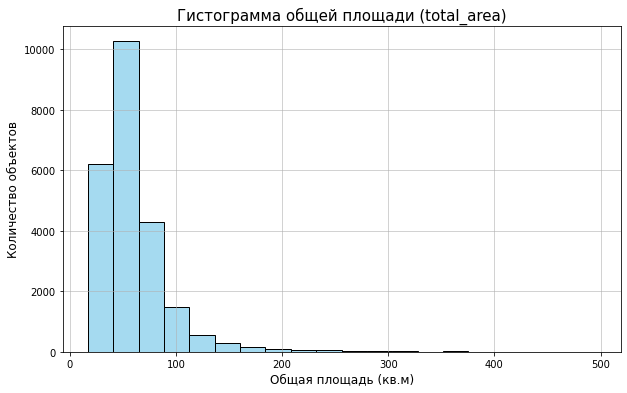

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(data['total_area'], bins=20, color='skyblue')
plt.title('Гистограмма общей площади (total_area)', fontsize=15)
plt.xlabel('Общая площадь (кв.м)', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.grid(alpha=0.7)

plt.show()

*Обратим внимание, что наиболее редко встречатся объекты более 200 кв.м., но если убрать эти объеткы будет удалено слишком большое количество данных, поэтому такие показатели оставим нетронутыми.*

*Посмотрим характеристики данных столбца total_area c помощью метода describe() чтобы зафиксировать описание данных в численном формате.*

In [37]:
print(data['total_area'].describe())

count    23546.000000
mean        60.136475
std         33.985407
min         17.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        495.000000
Name: total_area, dtype: float64


***Промежуточный вывод:***

Получили 23546 объектов.
Средняя площадь квартиры в датасете 60.13 кв.м..    
Стандартное отклонение говорит о том, что разброс общей площади квартир в датасете в пределах 33.98 кв.м..  
Минимальная площадь квартиры составляет 17.0 кв.м., указывет на наличие маленьких студий. 
Максимальная площадь квартиры составляет 495 кв.м. (после удаления аномальных значений).  
25% (Q1) квартир имеют площадь менее 40.0 кв.м. (первый квартиль).   
50% (медианое значение) квартир имеют площадь менее или более 52 кв.м..   
75% (Q3) квартир имеют площадь менее или равную 69.7 кв.м..*

* ***Жилая площадь (living_area)*** 

*Построим диаграмму размаха, визуально мы сможем понять присутствуют ли аномальные значения в данном столбце.*

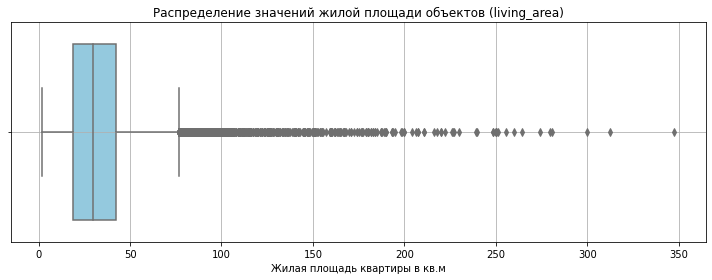

In [38]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['living_area'], color='skyblue')
plt.title('Распределение значений жилой площади объектов (living_area)')
plt.xlabel('Жилая площадь квартиры в кв.м')
plt.grid(True)
plt.tight_layout()

plt.show()

*Большое количство выбивающихся значений выходящих за рамки межквартильного размаха, это говорит о том что использовать квартили для очистики данных не получится - из-за потери большого объема данных - поэтому будем прикидывать логически и взглянем на минимальные жилые площади объектов*

In [39]:
print(data['living_area'].sort_values(ascending=True).head(30))

13915     2.00
21758     2.00
23574     3.00
3242      3.00
17582     5.00
21943     5.40
16431     6.00
19251     6.50
20994     8.00
23208     8.00
114       8.30
2309      8.40
21505     8.50
17248     8.90
8325      9.00
7312      9.00
19620     9.00
22252     9.00
4542      9.00
1326      9.00
4100      9.00
15833     9.00
680       9.00
22473     9.10
22356     9.77
21908     9.80
1816     10.00
1947     10.00
21909    10.00
15555    10.00
Name: living_area, dtype: float64


*Жилая площадь в 2 кв.м. выглядит не очень реалистично, это же касается и 3, 5, 6, кв метров, тем более таких показательй очень мало - эти строки из таблицы мы можем удалить. А вот 8 кв.м. уже достаточно массовое явление, таким образом оставим в таблице те строки где значение жилой площади от 8 кв.м. и более. Теперь рассмотрим максимальные значения для этого параметра*  

In [40]:
print(data['living_area'].sort_values(ascending=False).head(30))

12401    347.50
660      312.50
14088    300.00
9826     280.75
20273    279.60
22494    274.00
14498    264.50
19865    260.00
1085     255.70
3676     251.13
12971    250.00
793      250.00
15701    250.00
1494     250.00
15151    250.00
6221     248.70
15607    248.50
22131    239.89
20314    239.40
2580     230.00
5873     227.28
1388     226.71
16915    225.90
866      222.00
21955    220.00
7857     220.00
13749    218.00
6621     216.00
21685    211.00
19392    210.80
Name: living_area, dtype: float64


*Здесь выбиваются самые редкие значения жилой площади от 280 кв.м. и выше. Удалим значения жилой площади которые меньше или равны 8 и больше или равны 280, но так как есть пропуски оставим те строки где не указан параметр.*

In [41]:
data = data[(data['living_area'] >= 8.0) & (data['living_area'] <= 280.0) | (data['living_area'].isna())]

*Построим гистограмму на основании отфильтрованных данных*

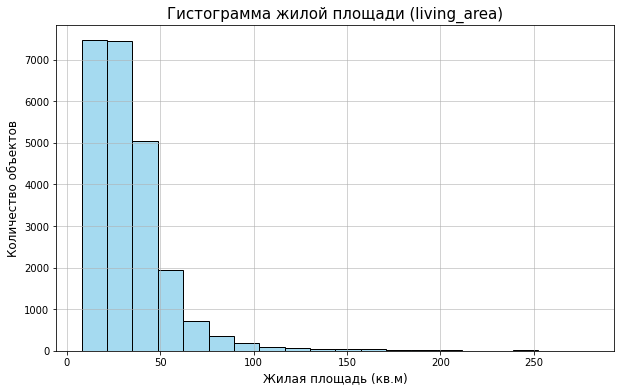

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data['living_area'], bins=20, color='skyblue')
plt.title('Гистограмма жилой площади (living_area)', fontsize=15)
plt.xlabel('Жилая площадь (кв.м)', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.grid(alpha=0.7)
plt.show()

*Обратим внимание, что наиболее редко встречатся объекты более 100 кв.м., но если убрать эти объеткы будет удалено слишком большое количество данных, поэтому такие показатели оставим нетронутыми.*

*Посмотрим характеристики данных столбца living_area c помощью метода describe() чтобы зафиксировать описание данных в численном формате.*

In [43]:
print(data['living_area'].describe())

count    23534.000000
mean        34.439083
std         21.281762
min          8.000000
25%         19.000000
50%         30.000000
75%         42.050000
max        279.600000
Name: living_area, dtype: float64


***Промежуточный вывод:*** 

Получили 23534 объектов.
Средняя жилая площадь квартиры составляет 34.43 квадратных метра, это типичный показатель жилой площади в данном датасете.  
Стандартное отклоенние от среднего значения 21,28 кв. м., а значит разброс жилой площади относительно среднего показателя вариируется в пределах этого показателя.  
Минимальная жилая составляет 8 квадратных метров. 
Максимальная жилая площадь квартиры составляет 279 квадратных метров (после удаления аномальных значений).  
25% (Q1) квартир имеют жилую площадь менее 19 кв. м. (первый квартиль).  
50% (медиана) квартир имеют жилую площадь менее 30 кв. м..   
75% (Q3) квартир имеют жалую площадь менее 42  кв. м.. Большая часть квартир в датасете меньше или равна 46 кв. м..

* ***Площадь кухни (kitchen_area)***

***Построим диаграмму размаха, визуально мы сможем понять присутствуют ли аномальные значения в данном столбце.***

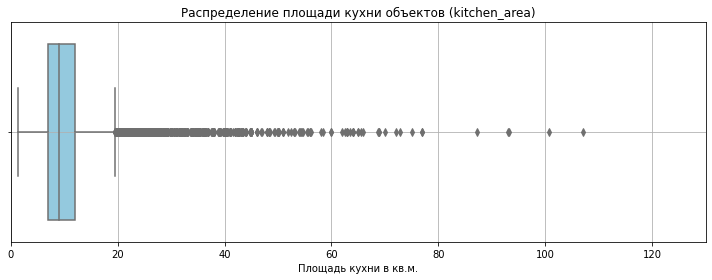

In [44]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['kitchen_area'], color='skyblue')
plt.title('Распределение площади кухни объектов (kitchen_area)')
plt.xlabel('Площадь кухни в кв.м.')
plt.xlim(0,130)
plt.grid(True)
plt.tight_layout()
plt.show()

*Логично что разброс площадей кухни большой как и площади объектов и снова смотрим на минимальные показатели столбца*

In [45]:
print(data['kitchen_area'].sort_values(ascending=True).head(20))

20217    1.30
16367    2.00
9138     2.00
906      2.00
11033    2.00
21419    2.00
6262     2.00
17834    2.30
8729     2.40
7950     2.89
716      2.93
22356    2.97
2165     3.00
15014    3.00
13814    3.00
10208    3.00
18066    3.00
17424    3.00
6084     3.00
9157     3.03
Name: kitchen_area, dtype: float64


*Помня о том, что у нас в таблице остались объекты от 17 кв.м. можно предположить что это студии и для них 2 кв.м. площади кухни - возможный метраж. А вот значения площади кухни менее 2 кв.м. достаточно редкое явление - поэтому уберем все что меньше 2 кв.м. площади кухнии и посмотрим на максимальные значения этого параметра*

In [46]:
print(data['kitchen_area'].sort_values(ascending=False).head(20))

20215    107.00
2489     100.70
16239     93.20
16797     93.00
10867     87.20
492       77.00
4394      77.00
14644     75.00
22131     72.79
16647     72.00
6193      70.00
5873      68.96
12971     68.96
1388      68.79
1085      66.00
7674      65.51
22980     65.00
18447     65.00
17912     64.00
19499     64.00
Name: kitchen_area, dtype: float64


*Здесь также есть большие, но редкие значения. Так как площадь квартир представленных в отфильтрованном датафрейме на данный момент ограничена площадью в 495 кв.м. показатель в 100 кв.м. допустим, остальные значения уберем из датафрейма.*

*Теперь удалим значения которые выходят обозначенные рамки, то есть раные или больше 2 кв.м. и равные или более 100 кв.м.,но так как есть пропуски оставим те строки где не указан параметр.*

In [47]:
data = data[(data['kitchen_area'] >= 2.0) & (data['kitchen_area'] <= 100)]

***Построим гистограмму на основании отфильтрованных данных.***

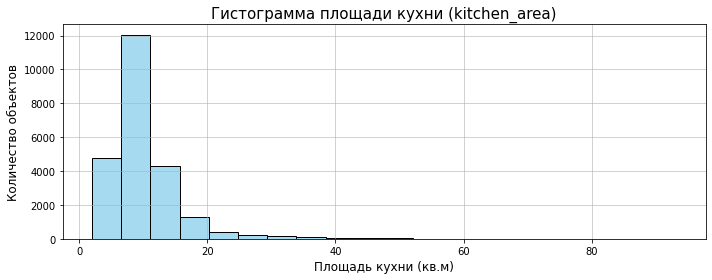

In [48]:
plt.figure(figsize=(10, 4))
sns.histplot(data['kitchen_area'], bins=20, color='skyblue')
plt.title('Гистограмма площади кухни (kitchen_area)', fontsize=15)
plt.xlabel('Площадь кухни (кв.м)', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

In [49]:
print(data['kitchen_area'].describe())

count    23531.000000
mean        10.455324
std          5.820136
min          2.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         93.200000
Name: kitchen_area, dtype: float64


***Промежуточный вывод:***.

Получили 23531 объектов.
Средняя площадь кухни составляет 10.45 кв. м..  
Стандартное отклоенние от среднего значения 5,82 кв. метров, а значит разброс жилой площади относительно среднего показателя варьируется в пределах этого показателя.  
Минимальная кухня по площади составляет 2 кв. м.. 
Максимальная площадь кухни составляет 93.2 кв. м.(после удаления аномальных значений).  
25% (Q1) квартир имеют кухню площадью менее 7 кв. м. (первый квартиль).   
50% (медиана) квартир имеют кухню площадью менее 9 кв. м..  
75% (Q3) квартир имеют кухню менее или равную 12  квадратных метров. 

* ***Цена объекта (last_price)***

*Посмотрим на диаграмму размаха и опеределим присутстуют ли аномальные значения.*

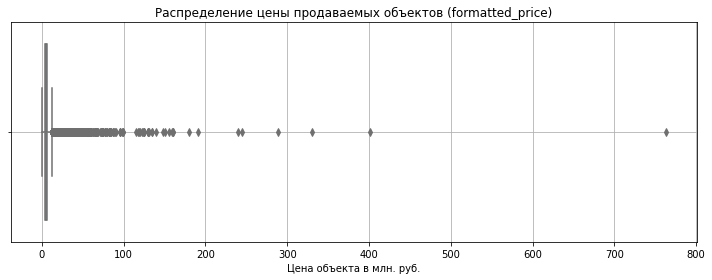

In [50]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['formatted_price'],color='skyblue')
plt.title('Распределение цены продаваемых объектов (formatted_price)')
plt.xlabel('Цена объекта в млн. руб.')
plt.grid(True)
plt.tight_layout()

plt.show()

*Обратимся к минимальным значениям столбца со стоимость объектов именно по столбцу last_price, так как столбец formatted_price создан для удоства отобра;ения графиков.*

In [51]:
print(data['last_price'].sort_values(ascending=True).head(30))

8793      12190.0
14911    430000.0
17456    430000.0
16274    440000.0
17676    450000.0
16219    450000.0
9581     450000.0
5698     450000.0
21912    470000.0
18867    470000.0
23484    470000.0
16032    480000.0
6859     490000.0
10782    490000.0
2097     500000.0
14904    500000.0
4405     500000.0
14295    500000.0
22430    520000.0
12607    530000.0
13768    550000.0
1053     550000.0
7962     550000.0
7376     550000.0
11351    550000.0
1358     550000.0
22997    560000.0
19460    560000.0
8630     560000.0
13809    565000.0
Name: last_price, dtype: float64


*Значение в 12190 рублей явно ошибочный показатель для квартиры в 109 кв.м. - от него мы избавимся. остальные показатели хоть и кажутся маленькими но все же носят довольно массовый характер - поэтому удалим только эту строку. и посмотрим квартиры с высокой самой высокой стоимостью*

In [52]:
print(data['last_price'].sort_values(ascending=False).head(30))

12971    763000000.0
14706    401300000.0
1436     330000000.0
22831    289238400.0
16461    245000000.0
13749    240000000.0
8900     190870000.0
19865    180000000.0
19155    160000000.0
2536     159984000.0
16495    159000000.0
1026     155000000.0
7857     150000000.0
22229    148000000.0
12674    140000000.0
17912    135000000.0
793      135000000.0
7674     131000000.0
2243     130278280.0
13864    130000000.0
21955    130000000.0
7543     130000000.0
1928     125000000.0
20349    124480000.0
21023    124350000.0
4996     124000000.0
16647    122000000.0
1300     120000000.0
20264    119000000.0
1188     118000000.0
Name: last_price, dtype: float64


 *Здесь значения логичны для квартир с большим метражом - которые мы оставили в датасете, но квартир стоимость более 40 млн. их не много относительно общего сила данных поэтому избавимся от таких показателей.*

In [53]:
data = data[(data['last_price'] != 12190.0) & (data['last_price'] < 100000000)]

***Построим гистограмму на основании отфильтрованных данных.***

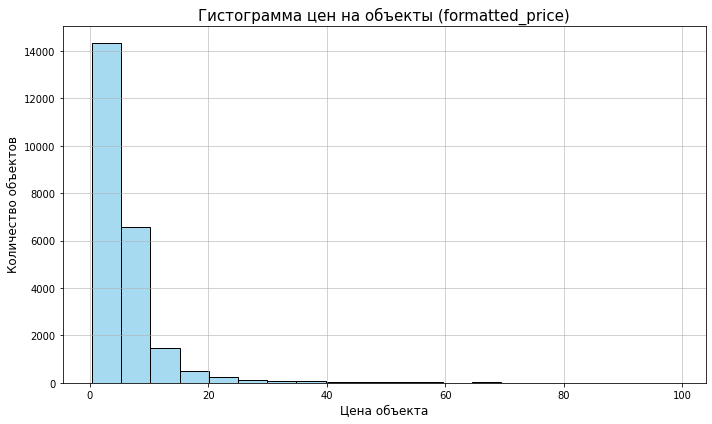

In [54]:
plt.figure(figsize=(10, 6))
sns.histplot(data['formatted_price'], bins=20, color='skyblue')
plt.title('Гистограмма цен на объекты (formatted_price)', fontsize=15)
plt.xlabel('Цена объекта', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.grid(alpha=0.7)
plt.tight_layout()

plt.show()

In [55]:
print(data['formatted_price'].describe())

count    23499.000000
mean         6.229929
std          6.321286
min          0.400000
25%          3.400000
50%          4.600000
75%          6.800000
max         99.000000
Name: formatted_price, dtype: float64


***Промежуточный вывод:***  
Получили 23499 объектов.  
Средняя стоимость квартиры составляет 6.2 млн. руб..  
Стандартное отклоенние от среднего значения 6,3 млн. руб., а значит разброс cтоимости относительно среднего показателя досточно большой.  
Минимальная стоимость составляет 0.4 млн. руб..   
Максимальная стоимость 99.0 млн. руб. (после удаления аномальных значений).  
25% (Q1) квартир стоят менее 3.4 млн. руб.. (первый квартиль).   
50% (медиана) квартир по стоимости 4.6 млн. руб..  
75% (Q3) квартир стоят менее 6.8 млн. руб.. 

* ***Количество комнат (rooms)***

*Посмотрим на диаграмму размаха и опеределим присутстуют ли аномальные значения.*

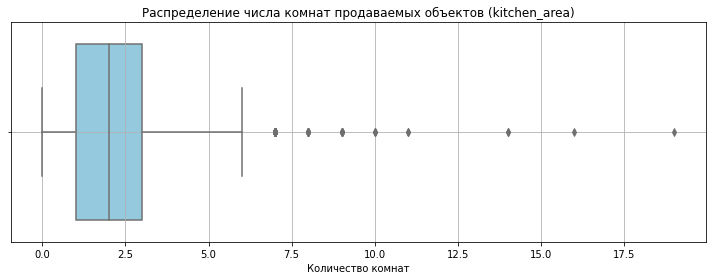

In [56]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['rooms'], color='skyblue')
plt.title('Распределение числа комнат продаваемых объектов (kitchen_area)')
plt.xlabel('Количество комнат')
plt.grid(True)
plt.tight_layout()
plt.show()

*Посмотрим на максимальные значения этого столбца, так как с минимальными все понятно 0 значение имеют студии.*

In [57]:
print(data['rooms'].sort_values(ascending=False).head(40))

14498    19
18848    16
20829    14
866      14
648      11
9688     11
18891    10
18119    10
4149     10
13019     9
20791     9
8860      9
9550      9
15151     9
13397     9
16915     9
8822      9
21990     8
8758      8
4435      8
10569     8
12447     8
18945     8
11436     8
20788     8
813       8
17203     8
23400     7
855       7
10294     7
2580      7
3365      7
2673      7
21685     7
5873      7
3545      7
8559      7
10684     7
6460      7
2462      7
Name: rooms, dtype: int64


*Начиная с 10 комнат значения уже более редкие, поэтому удалим эти строки из датафрейма*

In [58]:
data = data[(data['rooms'] <= 9)]

*Построим гистограмму на основании отфильтрованных данных.*

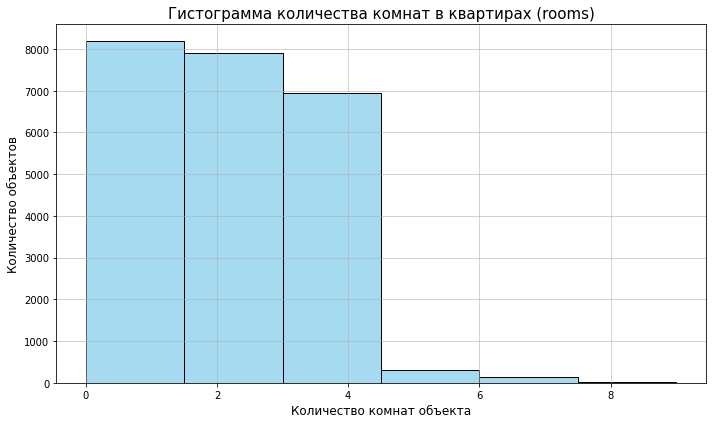

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(data['rooms'], bins=6, color='skyblue')
plt.title('Гистограмма количества комнат в квартирах (rooms)', fontsize=15)
plt.xlabel('Количество комнат объекта', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

In [60]:
print(data['rooms'].describe())

count    23490.000000
mean         2.060877
std          1.042029
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64


***Промужеточный вывод:***   
Количество объектов 23490.  
В среднем в продаваемых объектах 2 комнаты.  
Стандартное отклоенние от среднего значения 1.04, а значит остальные показатели относительо среднего практически не варьируются.
Минимальное количеcтвто комнат в объектах 0, что указывает на наличие студий или открытых планировок.
Максимальное количество комнат в объектах 9. (после удаления аномальных значений).  
25% (Q1) квартир имеют 1 комнату. (первый квартиль).   
50% (медиана) квартир имеют 2 комнаты. 
75% (Q3) квартир имеют 3 или менее комнат.

* ***Высота потолков (ceiling_height)***

*Вероятно разброс высоты потолков должен быть не сильно большой для жилых помещений, из информации открытых источников стандартная высота потолков колеблется в зависимости от года постройки здания и его класса, но в основном от 2,5 до 4,5 метров. Проверим значения в данном столбце на предмет аномалий в выборке визуально.* 

In [61]:
print(data['ceiling_height'].unique())

[  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.62   3.12   2.53   2.74
   2.96   2.46   5.     2.79   2.95   4.06   2.94   3.54   3.53   2.83
   2.4    3.38   3.01   5.6    3.65   3.9    3.18   3.35   2.3    3.57
   2.48   2.62   2.82   3.98   2.63   3.83   3.52   3.95   3.75   2.88
   3.67   3.87   3.66   3.86   4.19   3.24   4.8    4.5    4.2    3.36
  32.     3.08   3.68   3.07   3.37   3.09   8.     3.16   3.26   3.34
   2.81   3.44   2.97   4.37   2.68   3.22   3.27  27.     4.1    2.93
   3.46  24.     3.47   3.33   3.63   3.14   3.32  26.     1.2    8.3
   2.98   2.86   3.17   4.4    3.28   3.04   4.45   5.5    3.84   3.23
   3.02   3

*Сначала обратимся к величинам которые очевидно указаны с ошибкой и логически можно предложить, что, например, 25 метров это скорее всего 2.5 метра. Возьмем те значения что больше 20-ти метров и разделим на 10 для преобразования данных.*

In [62]:
data['ceiling_height'] = data['ceiling_height'].apply(lambda x: x / 10 if x >= 20 else x)

*Избавимся от пропущенных значений, заполнив их медианным значением высоты потолка. Медиану выбираем так как в таблице все еще остались аномальные значения и медиана будет к ним менее чувствительна чем среднее арифметическое.*

In [63]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

*Посмотрим на диаграмму размаха и опеределим присутстуют ли аномальные значения.*

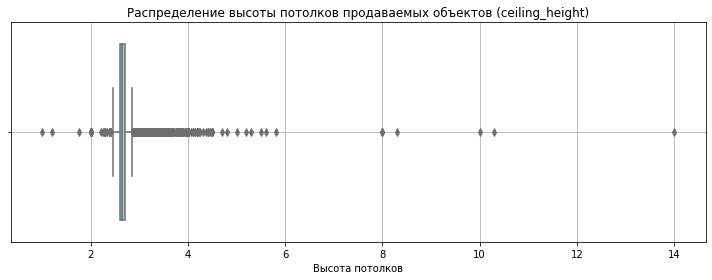

In [64]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['ceiling_height'], color='skyblue')
plt.title('Распределение высоты потолков продаваемых объектов (ceiling_height)')
plt.xlabel('Высота потолков')
plt.grid(True)
plt.tight_layout()
plt.show()

*Аномальные значения есть, но все удалить мы не можем - это черевато потерей большого объема данных.Посмотрим на самые большие и самые маленькие показатели этого столбца*

In [65]:
print(data['ceiling_height'].sort_values(ascending=False).head(40))

15061    14.00
22309    10.30
22869    10.00
5863      8.30
15743     8.00
3474      8.00
17442     8.00
21227     5.80
1388      5.60
7578      5.50
12628     5.30
464       5.20
1053      5.00
2802      4.80
19142     4.70
10159     4.50
9783      4.50
2823      4.50
6802      4.50
3067      4.50
14519     4.50
13224     4.50
7521      4.45
11651     4.40
7274      4.40
6728      4.40
4201      4.37
10754     4.30
17078     4.25
6901      4.20
14619     4.20
7279      4.20
11128     4.20
6617      4.20
2843      4.20
20873     4.20
19041     4.20
22494     4.20
22055     4.20
2999      4.19
Name: ceiling_height, dtype: float64


*Высота потолков более 4.50 уже редкий случай поэтому удалим объекты с такими показателями*

In [66]:
print(data['ceiling_height'].sort_values(ascending=True).head(20))

22590    1.00
5712     1.20
16934    1.75
16446    2.00
19098    2.00
11352    2.00
17496    2.00
5850     2.00
4212     2.00
22960    2.00
552      2.00
16884    2.00
2572     2.00
19329    2.00
20520    2.00
12755    2.20
17794    2.25
20507    2.26
17762    2.30
23498    2.30
Name: ceiling_height, dtype: float64


*В современных домах высота потолков должна быть не менее 2,5 метров. Возможно что в домах более старых годов постройки потолок 2.40, но высота меньше уже сомнительная.*

*Теперь удалим значения которые указывают на высоту потолка менее 2.40 и более 4.50.*

In [67]:
data = data[(data['ceiling_height'] >= 2.40) & (data['ceiling_height'] <= 4.50)]

*Построим гистограмму на основании отфильтрованных данных.*

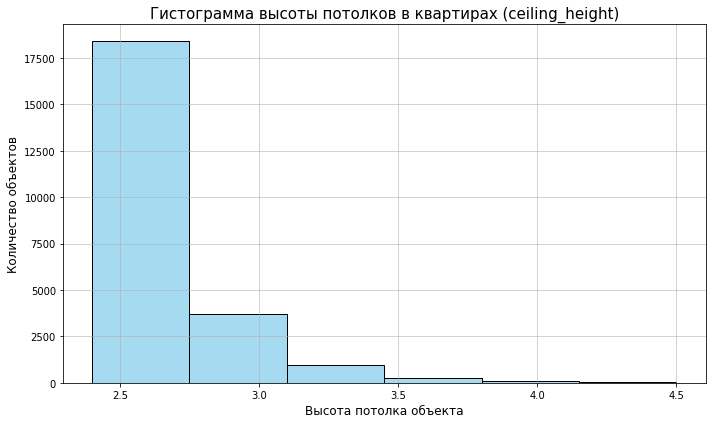

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(data['ceiling_height'], bins=6, color='skyblue')
plt.title('Гистограмма высоты потолков в квартирах (ceiling_height)', fontsize=15)
plt.xlabel('Высота потолка объекта', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.grid(alpha=0.7)
plt.tight_layout()

plt.show()

In [69]:
print(data['ceiling_height'].describe())

count    23452.000000
mean         2.695059
std          0.210984
min          2.400000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.500000
Name: ceiling_height, dtype: float64


***Промежуточный вывод:***.  

Получили 23452 объект.
В среднем в продаваемых объектах высота потолков 2.69 метра.  
Стандартное отклоенние от среднего значения 0.2, а значит остальные показатели относительо среднего сильно варьируются.  
Минимальная высота потолков 2.40 метра.  
Максимальная высота потолков 4.5 метра. (после удаления аномальных значений).  
25% (Q1) квартир имеют высоту потолков 2.6 метра. (первый квартиль).   
50% (медиана) имеют высоту потолков 2.65 метра.   
75% (Q3) имеют высоту потолков равную 2.7 метра или менее.

* ***Тип этажа квартиры (floor_type)***

*Ранее мы создали в таблице новый столбец тип этажа и присвоили этому столбцу 3 варианта значений первый, последний или другой. Аномалий и пропусков в столбце не будет, так как параметр этажи указаны для всех объектов, но для достоверности посмотри уникальные значения данного столбца.*

In [70]:
print(data['floor_type'].unique())

['другой' 'первый' 'последний']


*Построим гистограмму на основании этих данных.*

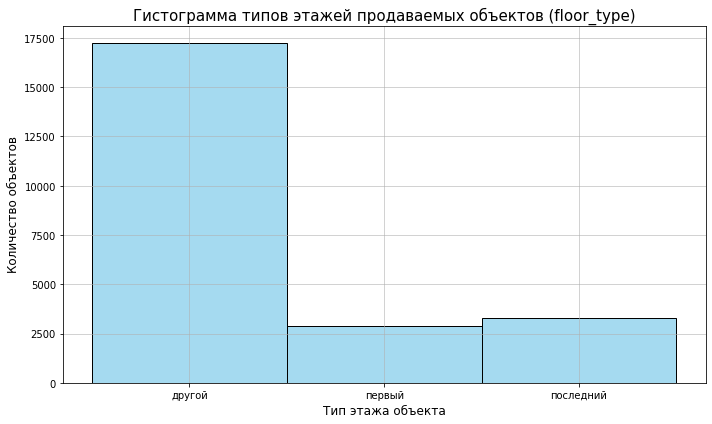

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(data['floor_type'], bins=3, color='skyblue')
plt.title('Гистограмма типов этажей продаваемых объектов (floor_type)', fontsize=15)
plt.xlabel('Тип этажа объекта', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.grid(alpha=0.7)
plt.tight_layout()

plt.show()

In [72]:
print(data['floor_type'].describe())

count      23452
unique         3
top       другой
freq       17263
Name: floor_type, dtype: object


***Промежуточный вывод:***

Наиболе часто встречается значение "другой", 17263 квартир которые расположены на отличных от первого и последнего этажей.

* ***Общее количество этажей в доме (floors_total)***

*Построим диаграмму размаха и посмотрим присутстуют ли аномальные значения.*

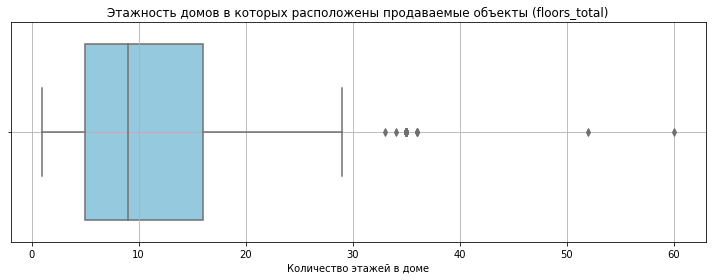

In [73]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['floors_total'], color='skyblue')
plt.title('Этажность домов в которых расположены продаваемые объекты (floors_total)')
plt.xlabel('Количество этажей в доме')
plt.grid(True)
plt.tight_layout()
plt.show()

***Посмотри на минимальные значения столбца***

In [74]:
print(data['floors_total'].sort_values(ascending=True).head(20))

11641    1
9517     1
16444    1
9752     1
18900    1
22550    1
5300     1
19590    1
21603    1
17744    1
7962     1
22855    1
22841    1
5698     1
4379     1
11746    1
8335     1
17020    1
8388     1
5787     1
Name: floors_total, dtype: int64


*Казалось что 1 этажный дом это редкость,но оказалось что таких объектов довольно много и нижнюю границу мы оставим без изменений*

***Теперь посмотрим сколько зданий с максимально большим количество этажей***

In [75]:
print(data['floors_total'].sort_values(ascending=False).head(30))

2253     60
16731    52
5807     36
397      36
11079    36
18617    35
14347    35
9186     35
5749     35
21809    35
18629    35
22946    35
5808     35
4855     35
8496     35
9579     35
9370     35
1060     35
2966     35
12960    35
7236     35
12888    35
21599    35
871      35
20938    35
15982    35
13975    35
18218    35
1917     35
1697     34
Name: floors_total, dtype: int64


*До 35 этажа в целом знаечния достаточно частые, а вот 36, 52 и 60 этажей уже редкие. Поэтому уберем их из таблицы***

In [76]:
data = data[(data['floors_total'] < 36)]

*Построим гистограмму на основании отфильтрованных данных.*

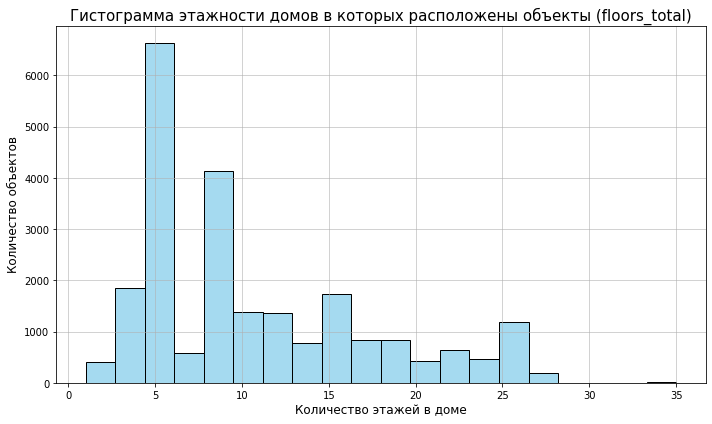

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(data['floors_total'], bins=20, color='skyblue')
plt.title('Гистограмма этажности домов в которых расположены объекты (floors_total)', fontsize=15)
plt.xlabel('Количество этажей в доме', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

In [78]:
print(data['floors_total'].describe())

count    23447.000000
mean        10.680641
std          6.576652
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         35.000000
Name: floors_total, dtype: float64


***Промежуточный вывод:***  
Получили 23447 объектов.  
Среднняя количество этажей в домах 10.  
Стандартное отклоенние от среднего значения 6.5, а значит остальные показатели относительно среднего варьируются в пределах 6-7 этажей.    
Самое высокое здание 35 этажей (после удаления аномальных значений).  
25% (Q1) домов имеют высоту в 5 этажей или менее. (первый квартиль).  
50% (медиана) домов имеют высоту 9 этажей.    
75% (Q3) домов имеют высоту мнее или равную 16 этажам.  

* ***Pасстояние до центра города в метрах (city_сenters_nearest)***

*Посмотрим на диаграмму размаха и опеределим присутстуют ли аномальные значения.*

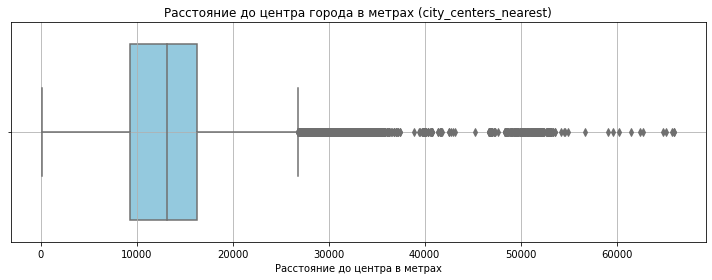

In [79]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['city_centers_nearest'], color='skyblue')
plt.title('Расстояние до центра города в метрах (city_centers_nearest)')
plt.xlabel('Расстояние до центра в метрах')
plt.grid(True)
plt.tight_layout()
plt.show()

*Обратимся к минимальным показтелям расстояния до центра города*

In [80]:
print(data['city_centers_nearest'].sort_values(ascending=True).head(20))

13694    181.0
1182     208.0
8614     215.0
1934     287.0
20873    291.0
10867    318.0
11492    318.0
7726     318.0
10377    318.0
13919    318.0
11723    318.0
5297     318.0
1109     318.0
22036    329.0
8677     376.0
8239     387.0
17078    392.0
2291     399.0
2609     399.0
9488     410.0
Name: city_centers_nearest, dtype: float64


*Показатели до центра реалистичны, но наиболее редкие значения встречаются после показателя в 318 метров.*

*Обратимся к максимальным показтелям расстояния до центра города*

In [81]:
print(data['city_centers_nearest'].sort_values(ascending=False).head(50))

9640     65968.0
5340     65952.0
577      65764.0
20746    65105.0
5218     64857.0
18884    62706.0
2974     62454.0
16569    61495.0
23123    60223.0
4441     59626.0
11244    59052.0
939      56745.0
376      54926.0
6247     54646.0
22941    54490.0
22855    54214.0
18096    53568.0
8862     53568.0
17683    53383.0
20191    53379.0
1556     53294.0
3936     53177.0
23014    53138.0
10541    53132.0
302      53104.0
19729    53088.0
4893     53078.0
9154     53028.0
20326    53028.0
19349    52974.0
20981    52974.0
7324     52968.0
19482    52943.0
13751    52900.0
4642     52895.0
17993    52858.0
16223    52818.0
18895    52768.0
23100    52768.0
1687     52768.0
2036     52717.0
9493     52717.0
2481     52716.0
3477     52696.0
9679     52696.0
4906     52628.0
20995    52380.0
18080    52380.0
200      52334.0
17165    52328.0
Name: city_centers_nearest, dtype: float64


*Есть значительно удаленные объект как от центра так и судя по всему от самого города, но так как в нашем датасете есть пригородные объекты это тоже возможно поэтому здесь данные оставим без изменений.*

*Удалим объекты ближе 318 метров к центру города*

In [82]:
data = data[(data['city_centers_nearest'] >= 318) | (data['city_centers_nearest'].isna())]

*Построим гистограмму на основании отфильтрованных данных.*

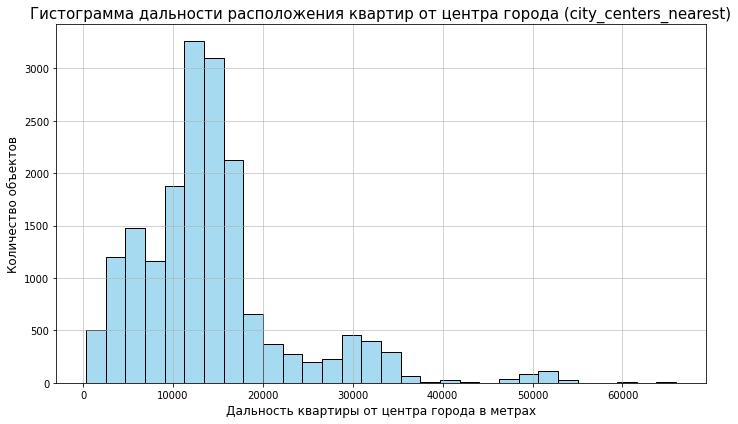

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(data['city_centers_nearest'], bins=30, color='skyblue')
plt.title('Гистограмма дальности расположения квартир от центра города (city_centers_nearest)', fontsize=15)
plt.xlabel('Дальность квартиры от центра города в метрах', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

In [84]:
print(data['city_centers_nearest'].describe())

count    17961.000000
mean     14231.960915
std       8605.806691
min        318.000000
25%       9290.000000
50%      13135.000000
75%      16293.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


***Промежуточный вывод:***

Получили 17961 объекта у которых указано расстояние до центра города.  
В среднем квартиры находятся на расстоянии 14231.54 метров от центра города.  
Стандартное отклонение равно 8605.74 метров, что говорит о большом разбросе данных. Квартиры могут существенно различаться по дальности до центра.  
Минимальное расстояние до центра составляет 318 метров, что может соответствовать квартирам в центральных районах города.  
Максимальное расстояние – 65968 метров, указывающее на квартиры, расположенные в пригородных районах.  
25% квартир расположены на расстоянии до 9289 метров от центра.  
Медианное значение (50%) равно 13131 метрам, что означает, что половина квартир находится ближе, а половина – дальше этого значения.  
75% квартир находятся на расстоянии до 16293 метров или ближе к центру города.

* ***Расстояние до ближайшего парка (parks_nearest)***

*Посмотрим на диаграмму размаха и опеределим присутстуют ли аномальные значения.*

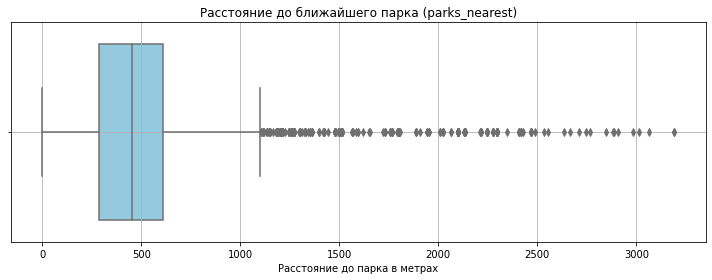

In [85]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['parks_nearest'], color='skyblue')
plt.title('Расстояние до ближайшего парка (parks_nearest)')
plt.xlabel('Расстояние до парка в метрах')
plt.grid(True)
plt.tight_layout()

plt.show()

*Посмотрим на объекты ближе всего расположенные к паркам*

In [86]:
print(data['parks_nearest'].sort_values(ascending=True).head(20))

14624     1.0
11949     3.0
22941     4.0
9344      7.0
20193     9.0
2527      9.0
189      10.0
19093    10.0
7788     10.0
214      10.0
15296    10.0
21773    10.0
4470     10.0
19215    11.0
12018    11.0
16831    11.0
21167    11.0
1214     11.0
14015    12.0
2319     13.0
Name: parks_nearest, dtype: float64


*10 метров уже достаточно распространенное расстояние до парка, поэтому нижней границей для нас будт порог в 10 метров*

In [87]:
print(data['parks_nearest'].sort_values(ascending=False).head(20))

19430    3190.0
10959    3190.0
1590     3064.0
19208    3013.0
23080    2984.0
2659     2905.0
1860     2888.0
7855     2880.0
3865     2847.0
22003    2768.0
7316     2747.0
5923     2711.0
1804     2665.0
6625     2633.0
18327    2555.0
18685    2532.0
17173    2489.0
15226    2467.0
8393     2467.0
15456    2467.0
Name: parks_nearest, dtype: float64


*Противоречий в таких данных нет, но значения больше 3х километров редко встречаются, поэтому избавимся и от них.*

*Теперь удалим объекты расположеные к парке ближе чем на 10 метров и дальше 3 км.*

In [88]:
data = data[(data['parks_nearest'] >= 10) & (data['parks_nearest'] <= 3000) | (data['parks_nearest'].isna())]

***Построим гистограмму на основании отфильтрованных данных.***

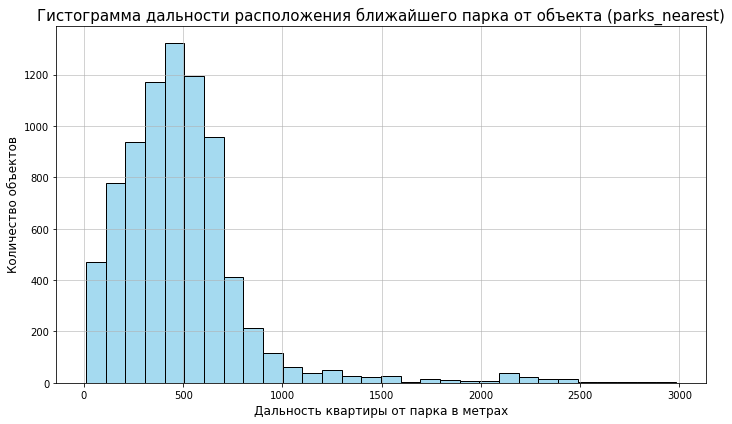

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(data['parks_nearest'], bins=30, color='skyblue')
plt.title('Гистограмма дальности расположения ближайшего парка от объекта (parks_nearest)', fontsize=15)
plt.xlabel('Дальность квартиры от парка в метрах', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.grid(alpha=0.7)
plt.tight_layout()
plt.show()

In [90]:
print(data['parks_nearest'].describe())

count    7947.000000
mean      489.771612
std       336.738798
min        10.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      2984.000000
Name: parks_nearest, dtype: float64


***Промежуточные выводы:***    
Получили 7947 объектов с заполненем расстоянием до парка.  
В среднем расстояние до ближайшего парка составляет приблизительно 489.78 метров. Это довольно близкое расстояние, что может указывать на хорошую инфраструктуру.  
Стандартное отклонение равно 336.71 метров, в рамках этого параметра варьируется показатель в  датасете.
Минимальное расстояние до ближайшего парка составляет 10 метров, что указывает на наличие квартир, расположенных в непосредственной близости к зеленым зонам.  
Максимальное расстояние – 2984 метров, сигнализируя о том, что некоторые квартиры находятся на значительном удалении от любого парка.  
25% квартир расположены на расстоянии до 288 метров от ближайшего парка.  
50% квартир от парка на расстоянии 455 метров, что указывает на то, что половина квартир расположена ближе, а половина – дальше этого расстояния.  
75% квартир находятся на расстоянии до 612 метров, что подтверждает, что из большинства квартир может довольно удобно добираться до зеленых зон.  
В целом, данные показывают, что квартиры в рассматриваемом наборе данных имеют хорошую доступность к паркам, что может быть важным фактором для потенциальных покупателей, учитывающих значение наличия зеленых пространств вблизи жилья.

#### Срок продажи квартир ####

*Посмотрим как отличаются сроки продажи квартир. Уберем все строки с пропущенными значениями, далее выведем среднее и медианное время продажи с округлением до ближайшего целого значения.*

In [91]:
data['days_exposition'] = data['days_exposition'].dropna()

mean_days = data['days_exposition'].mean().round()
median_days = data['days_exposition'].median().round()

print('Среднее время продажи', mean_days)
print('Медианное время продажи', median_days)

Среднее время продажи 181.0
Медианное время продажи 95.0


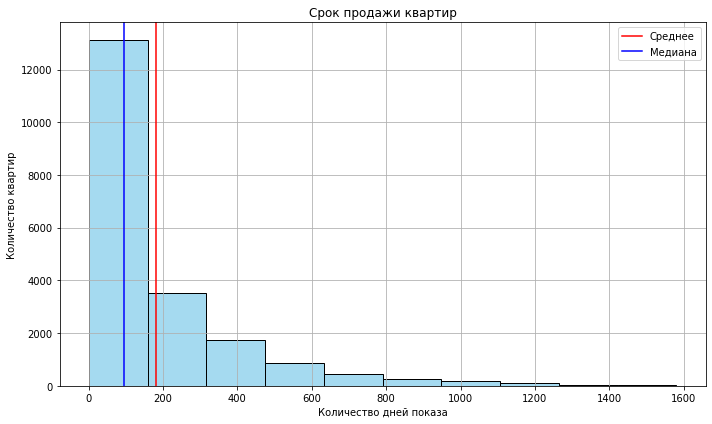

In [92]:
plt.figure(figsize=(10,6))
sns.histplot(data['days_exposition'], bins=10, color='skyblue')
plt.title('Срок продажи квартир')
plt.xlabel('Количество дней показа')
plt.ylabel('Количество квартир')
plt.grid()

plt.axvline(mean_days, color='r', linestyle='-', label='Среднее')
plt.axvline(median_days, color='b', linestyle='-', label='Медиана')
plt.tight_layout()

plt.legend()
plt.show()

*Визуализируем распределение величин на диаграмме размаха, чтобы понять где начинаются аномальные значения по количеству дней продажи квартир.*

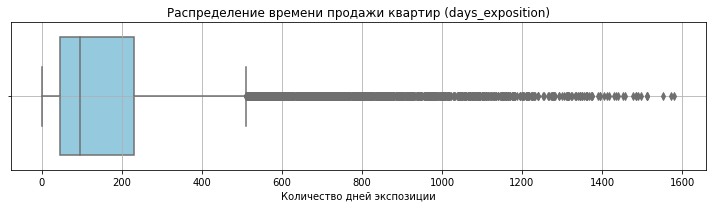

In [93]:
plt.figure(figsize=(10, 3))
sns.boxplot(x=data['days_exposition'], color='skyblue')
plt.title('Распределение времени продажи квартир (days_exposition)')
plt.xlabel('Количество дней экспозиции')
plt.grid(True)
plt.tight_layout()

plt.show()

Рассчитаем границы межквартального размаха.

In [94]:
Q1 = data['days_exposition'].quantile(0.25)
Q3 = data['days_exposition'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print('Lower Bound', lower_bound)
print('Upper Bound', upper_bound)

Lower Bound -234.0
Upper Bound 510.0


***Вывод:***. 

Мы получили 2 значения: среднее и медианное. Они значительно отличаются друг от друга из-за вбросов(аномалий) которые мы выдим на графике. Средний срок продажи квартиры 181 день (6 месяцев), а медианное время 95 дней (около 3х месяцев). Медианное время будет в данном случае более корректным значением - и квартира которая продана в срок около 3х месяцев (до 95 дней) будет считаться быстрой продажей. А вот квартиры которые находятся в продаже уже более 510 дней - можно считать необычно долгими. 

#### Факторы вляющие на стоимость объекта ####

* ***Зависимость цены от общей площади квартиры***

Для определения силы влияния каждого фактора на стоимость квартиры обратимся к коэффиценту корелляции Пирсона. 

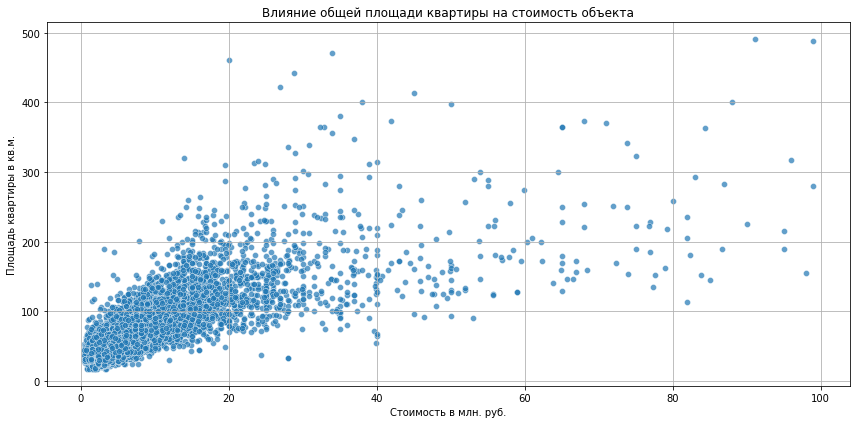

In [95]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data=data, x='formatted_price', y='total_area', alpha=0.7)

plt.title('Влияние общей площади квартиры на стоимость объекта')
plt.xlabel('Стоимость в млн. руб.')
plt.ylabel('Площадь квартиры в кв.м.')
plt.tight_layout()

plt.grid(True)
plt.show()

Рассчитаем коэффицент корреляции.

In [96]:
print(data['total_area'].corr(data['formatted_price']))

0.7635146825306143


***Вывод:***  

Значение 0.763 указывает на достаточно сильную положителью корреляцию. Это значит что с увеличением площади квартиры, как правило, стоимость квартиры также возрастает.
Хотя наблюдается сильная связь между площадью и стоимостью, это не обязательно означает, что увеличение площади квартиры непосредственным образом приводит к увеличению её стоимости. Возможны и другие факторы, влияющие на стоимость (район, часть города, наличие инфраструктуры и т. д.)

* ***Зависимость цены от жилой площади***

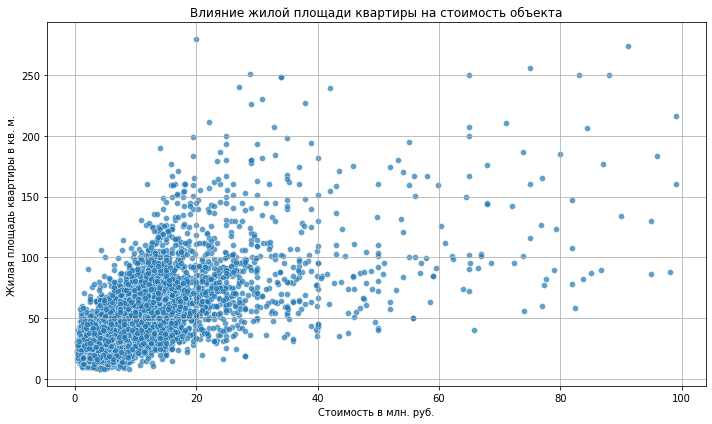

In [97]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data=data, x='formatted_price', y='living_area', alpha=0.7)

plt.title('Влияние жилой площади квартиры на стоимость объекта')
plt.xlabel('Стоимость в млн. руб.')
plt.ylabel('Жилая площадь квартиры в кв. м.')
plt.tight_layout()
           
plt.grid(True)
plt.show()

In [98]:
print(data['living_area'].corr(data['formatted_price']))

0.6837209172287195


***Вывод:***  
Коэффицент корреляции 0,683, указывает на наличие умеренной положительной корреляции между этими двумя переменными. 
Это означает, что существует связь между жилой площадью и стоимостью квартиры, но она не так сильна, как в случае с общей площадью, где коэффициент корреляции был 0.763.
Положительное значение коэффициента подтверждает, что при увеличении жилой площади стоимость квартиры, как правило, тоже растет. В то же время, эта связь не является очень сильной, что может указывать на большее влияние других факторов на цену чем в случае с общей площадью.

* ***Зависимость цены от площади кухни***

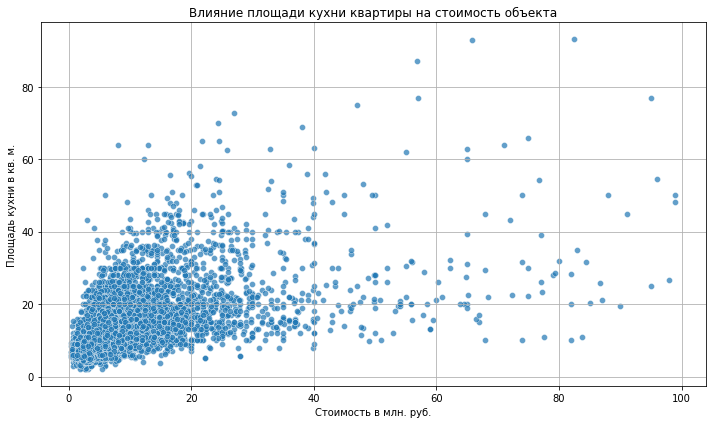

In [99]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data=data, x='formatted_price', y='kitchen_area', alpha=0.7)

plt.title('Влияние площади кухни квартиры на стоимость объекта')
plt.xlabel('Стоимость в млн. руб.')
plt.ylabel('Площадь кухни в кв. м.')
plt.tight_layout()

plt.grid(True)
plt.show()

In [100]:
print(data['kitchen_area'].corr(data['formatted_price']))

0.6099665051916453


***Вывод:***  
Значение 0.609 указывает на то, что существует умеренная положительная связь между площадью кухни и стоимостью квартиры. Это означает, что в среднем, когда площадь кухни увеличивается, стоимость квартиры также имеет тенденцию к увеличению.
По сравнению с предыдущими показателями модно сказать что площадь кухни имеет меньшее влияние на стоимость квартиры чем общая площадь и жилая площадь.

* ***Влияние количества комнат на цену***

*Для оценки вляния количества комнат на стоимость квартиры воспользуемся сводной таблицей и вычислим медианное значение стоимости квартиры в каждой группе по количеству комнат.*

In [101]:
pivot_table_rooms = data.pivot_table(index='rooms', values='formatted_price', aggfunc='median')
print(pivot_table_rooms)

       formatted_price
rooms                 
0                 2.70
1                 3.60
2                 4.80
3                 6.20
4                 9.00
5                13.50
6                17.90
7                22.90
8                21.05
9                23.75


*Теперь на основании эих данных визуализируем столбчатый график средней цен от количества комнат в квратире.*

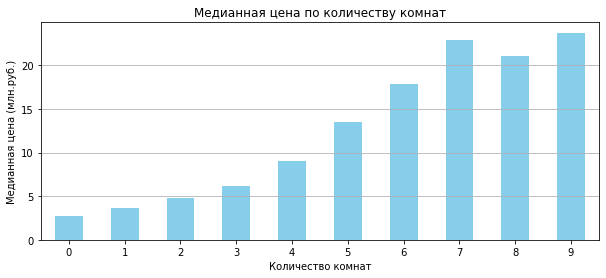

In [102]:
pivot_table_rooms.plot(kind='bar', figsize=(10, 4), legend=False, color='skyblue')
plt.title('Медианная цена по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Медианная цена (млн.руб.)') 
plt.xticks(rotation=0) 
plt.grid(axis='y')

plt.show()

***Вывод:*** 
Начиная с объектов с нулевым количеством комнат (студии или открытые планировки) медианная стоимость растет до объектов с 7 комнатами, что говорит о том, что объекты с большим количество комнат дороже.
На уровне 8 комнат стоимость немного снижается что говорит о том, что большее количество комнат не всегда определеяющий фактор и после опередленного метража помещения есть и другие факторы влияющие на стоимость объектов.
Взаимосвязь между количеством комнат и стоимостью немонотонна: цена не растет равномерно, а имеет колебания, которые могут быть обусловлены различными факторами, такими как расположение, площадь, инфраструктура и другие характеристики объектов.

* ***Влияние типа этажа на стоимость квартиры***

*Для оценки вляния типа этажа дома на стоимость квартиры воспользуемся сводной таблицей и вычислим среднее значение стоимости квартиры в каждой группе по типу этажа.*

In [103]:
pivot_table_floor_type = data.pivot_table(index='floor_type', values='formatted_price', aggfunc='mean')
print(pivot_table_floor_type)

            formatted_price
floor_type                 
другой             6.456291
первый             4.773633
последний          6.226442


*Теперь на основании эих данных визуализируем столбчатый график средней цен от количества комнат в квратире.*

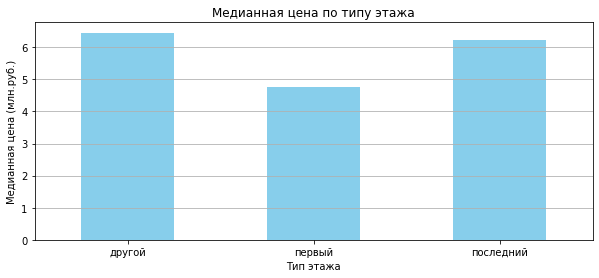

In [104]:
pivot_table_floor_type.plot(kind='bar', figsize=(10, 4), legend=False, color='skyblue')
plt.title('Медианная цена по типу этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Медианная цена (млн.руб.)') 
plt.xticks(rotation=0) 
plt.grid(axis='y')

plt.show()

***Вывод:***  
Рассчет среднего значения для каждого типа этажа показывает, что квартиры на последнем этаже могут иметь более качественные виды и меньше соседей, что делает их более привлекательными.
Квартиры на первом этаже часто имеют меньшую стоимость. Это может быть связано с рядом факторов, например, более легкий доступ для злоумышленников, а также отсутствие такого преимущества как вид из окна.  
Наблюдается заметное различие в средней стоимости квартир в зависимости от типа этажа. Квартиры, расположенные на последних этажах, ценятся выше, чем на первом.  

* ***Влияние даты размещения объявления на стоимость квартиры (день недели, месяц, год)***

Так как нам необходимо проверить влияние нескольких факторов на стоимость сделаем это пошагово сначала определим влияние года, а затем месяца и дня размщения объявления.

Так как в таблице достаточно много объектов, перед построением графика создадим сводную таблицу и рассчитаем среднюю стоимость квартиры за каждый год.

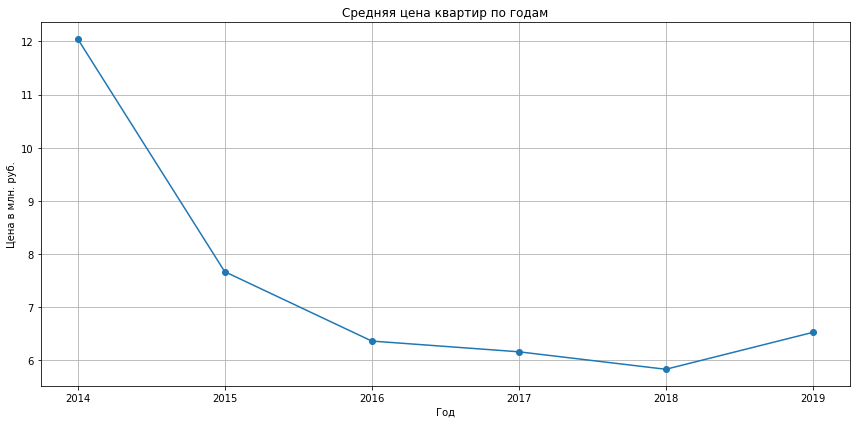

In [105]:
price_by_year = data.pivot_table(index='year_exposition', values='formatted_price', aggfunc='mean').reset_index()

plt.figure(figsize=(12, 6))
plt.plot(price_by_year['year_exposition'], price_by_year['formatted_price'], marker='o')
plt.title('Средняя цена квартир по годам')
plt.xlabel('Год')
plt.ylabel('Цена в млн. руб.')
plt.tight_layout()
plt.grid()
plt.show()

***Вывод:***   
Высокий показатель стоимости в 2014 году (на уровне 12 млн.руб.) может указывать на положительные экономические условия, высокий спрос на жилье или другие факторы, способствующие росту цен, и также на более дорогостоящие объекты в продаже, а вот падение цены к 2015 году (до 7,8 млн.руб.) может указывать на ухудшение экономики и сильное влияние внешних факторов таких как появление жилых комплексов с квартирами гораздо мешьнего метража (студий или однокомнатных квартир). Вплоть до 2018 года идет снижение цены и достигает своего минимума (на отметке в 5,8 млн.руб.) что говорит о сохранении проблем, хоть динамика снижения становится менее интенсивной. В 2019 году цена немного восстанавливается до (до 6,5 млн.руб.), но остается значительно ниже уровней 2014 года. Это может означать, что рынок начал стабилизироваться после двух лет снижения цен, но не достиг предыдущих уровней.***


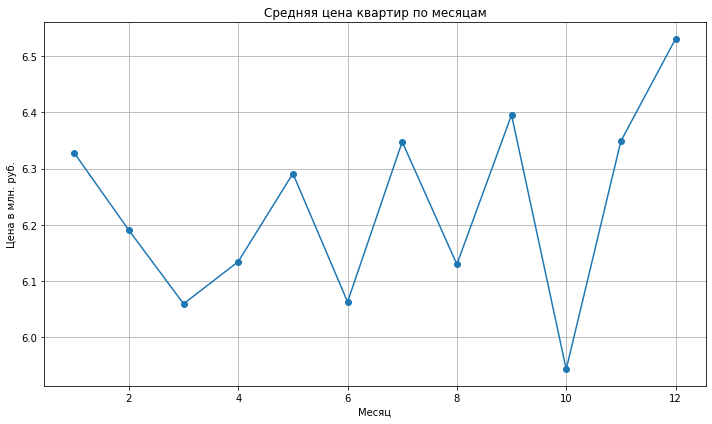

In [106]:
price_by_month = data.pivot_table(values='formatted_price', index='month_exposition', aggfunc='mean').reset_index()

plt.figure(figsize=(10, 6))
plt.plot(price_by_month['month_exposition'], price_by_month['formatted_price'], marker='o')
plt.title('Средняя цена квартир по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Цена в млн. руб.')
plt.tight_layout()
plt.grid()

plt.show()

***Вывод:***
На графике видно, что минимальная стоимость наблюдатеся в октябре (на уровне 6 млн. руб.), а максимальный показатель достигнут в декабре (на уровне 6.7 млн. руб.). Но при этом график не показывает какой либо тенденции так как колебания происходят в рамках 700 тысяч. Утверждать что есть прямая связь между месяцем публикации и стоимость квартиры нельзя. Однако мы видим что основные колебания в стоимости происходят к концу года (в последнем квартале). Есть вероятность, что здесь имеют силу внешние факторы не представленные на графике - сезонность, экономическая обстановка или политические факторы. 

*И посмотрим влияние дня публикации на стоимость квартиры*

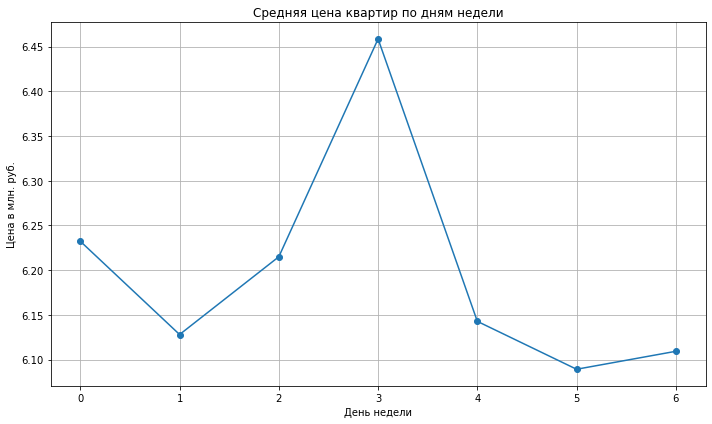

In [107]:
price_by_day = data.pivot_table(index='day_exposition', values='formatted_price', aggfunc='mean').reset_index()

plt.figure(figsize=(10, 6))
plt.plot(price_by_day['day_exposition'], price_by_day['formatted_price'], marker='o')
plt.title('Средняя цена квартир по дням недели')
plt.xlabel('День недели')
plt.ylabel('Цена в млн. руб.')
plt.grid()
plt.tight_layout()

plt.show()

***Вывод:***  
Разница значений колеблется в небольшом диапазоне в 400 000 руб. Минимальная средняя стоимость наблюдается во субботу (на уровне 6 млн. руб.), а максимальная в четверг (на уровне 6.5 млн. руб.). Возможно что в выходные дни спрос на квартиры снижается, это может быть связано с тем, что многие люди предпочитают тратить время на отдых в выходные, а не заниматься покупкой недвижимости. В результате, выбор жилья в эти дни становится меньше, что может снижать среднюю цену. Это также подтверждает показатель средней стоимости в воскресенье, он чуть выше чем в субботу, но меньше чем в будние дни. Пик стоимости в четверг может свидетельствовать, что после первой половины рабочей недели покупатели возвращаются к вопросу выбора недвижимости в наибольшем количестве.

#### Стоимость 1 квадратного метра ####

*Посмотрим 10 населенных пунктов в которых наибольшее число объявлений. Для этого сгруппируем данные исходного датафрейма по столбцу locality_name*

In [108]:
pivot_table_locality = data.pivot_table(index='locality_name', values='price_square_meter', aggfunc={'price_square_meter': 'mean', 'locality_name': 'count'}).rename(columns={'locality_name': 'count_locality'})

*Теперь выберем топ 10 локаций с наибольшим количество объявлений для этого проведем соритровку по количеству объектов в каждом населенном пункте  от большего к меньшему.*

In [109]:
top_10_locality = pivot_table_locality.sort_values(by='count_locality', ascending=False).head(10)
top_10_locality.reset_index(inplace=True)
print(top_10_locality)

       locality_name  count_locality  price_square_meter
0    Санкт-Петербург           15542       113511.173557
1     поселок Мурино             551        85601.120762
2     поселок Шушары             439        78551.344647
3         Всеволожск             397        68719.320378
4             Пушкин             369       103125.819377
5            Колпино             338        75424.579112
6  поселок Парголово             327        90175.913089
7            Гатчина             307        68746.146515
8    деревня Кудрово             299        92473.547559
9             Выборг             235        58238.143277


*Визуализируем график самых распростарненных локаций в датасете на основании сводной таблицы top_10_locality* 

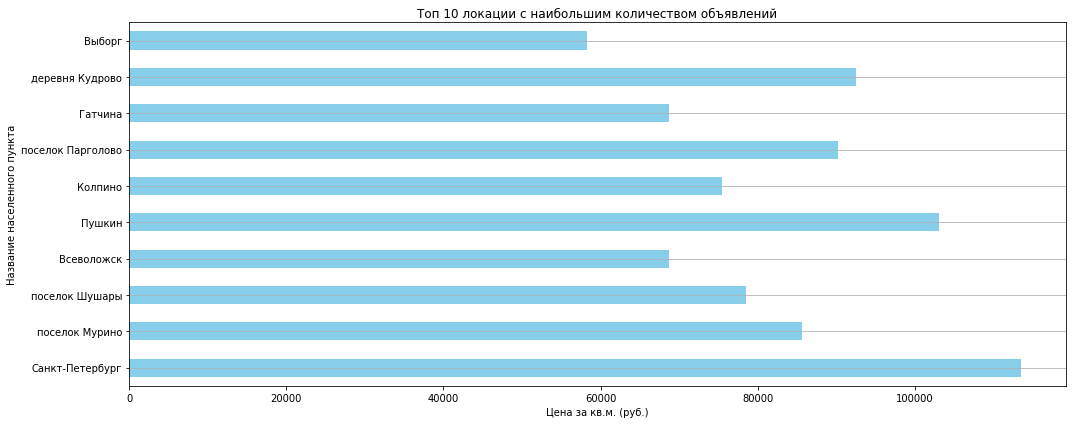

In [110]:
top_10_locality.plot(x='locality_name', y='price_square_meter', kind='barh', figsize=(15, 6), legend=False, color='skyblue')
plt.title('Топ 10 локации с наибольшим количеством объявлений')
plt.xlabel('Цена за кв.м. (руб.)')
plt.ylabel('Название населенного пункта') 
plt.xticks(rotation=0) 
plt.grid(axis='y')
plt.tight_layout()

plt.show()

*Теперь выделим среди населенных пунктов самую высокую и самую низкую стоимость за квадратный метр.*

In [111]:
most_expensive_locality = top_10_locality.loc[top_10_locality['price_square_meter'].idxmax()]
least_expensive_locality = top_10_locality.loc[top_10_locality['price_square_meter'].idxmin()]

print('\nНаселённый пункт с самой высокой стоимостью квадратного метра:')
print(most_expensive_locality)
print('\nНаселённый пункт с самой низкой стоимостью квадратного метра:')
print(least_expensive_locality)


Населённый пункт с самой высокой стоимостью квадратного метра:
locality_name         Санкт-Петербург
count_locality                  15542
price_square_meter      113511.173557
Name: 0, dtype: object

Населённый пункт с самой низкой стоимостью квадратного метра:
locality_name               Выборг
count_locality                 235
price_square_meter    58238.143277
Name: 9, dtype: object


#### Расстояние до центра ####

*Сначала отфильтруем квартиры которые расположены в Санкт-Петербурге.*

In [112]:
spb_apartments = data[data['locality_name'] == 'Санкт-Петербург']

In [113]:
average_price_by_distance = spb_apartments.groupby('city_сenters_nearest_km')['formatted_price'].mean().reset_index()
print(average_price_by_distance)

    city_сenters_nearest_km  formatted_price
0                       0.0        29.576190
1                       1.0        16.209341
2                       2.0        14.897342
3                       3.0        11.121037
4                       4.0        11.395582
5                       5.0        12.590869
6                       6.0        13.435809
7                       7.0        13.678883
8                       8.0         9.218475
9                       9.0         6.957046
10                     10.0         6.505882
11                     11.0         6.237167
12                     12.0         5.832663
13                     13.0         6.083276
14                     14.0         5.626374
15                     15.0         5.879282
16                     16.0         5.381141
17                     17.0         5.301841
18                     18.0         5.095785
19                     19.0         5.051282
20                     20.0         5.875556
21        

*Построим график на основании полученных данных и посмотрим*

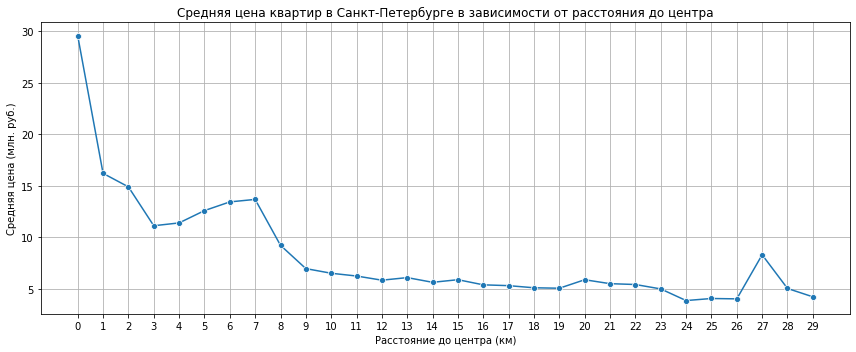

In [114]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=average_price_by_distance, x='city_сenters_nearest_km', y='formatted_price', marker='o')
plt.title('Средняя цена квартир в Санкт-Петербурге в зависимости от расстояния до центра')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя цена (млн. руб.)')
plt.xticks(average_price_by_distance['city_сenters_nearest_km'])
plt.tight_layout()
plt.grid()

plt.show()

***Вывод:*** 
На графике видно, что самая высокаця цена квартир расположенных в самом центре города. И идет снижение цены вплоть до удаленности от центра в 21 км, где стоимость достигает минимума в 11 млн. руб.  
Однако на графике наблюдаются пики:  
- на отрезке с  3 км. до 7 км. цена на кваритру растет, что может указывать на наличие более привлекательных жилых комплексов в этих районах для покупателей нежели непосредственно в центре города. При этом квартиры расположенные в этих районах не очень далеко расположены от центра, а их стоимость значительно ниже с по сравнению с квартирами в центре.
- на удалении в 15 км. и 20 км. также есть небольшие пики - которые могут быть связаны с появлением благоустроенных жилых комплексов, хорошей транспортной доступностью или другими привлекательными характеристиками этих районов.
- пик на отметке в 27 км. представляются аномальными, на таких расстояния влияние билзости центра города явно сильно снижается для покупателей, а значит на первый план выходят другие факторы.

### Общий вывод

Перед проведение исследовательского анализа данных на предмет влияния на стоимость объектов была проведена предобработка данных и выполнены следующие шаги:  

***Удаление пропусков.*** Пропущенные значения были обнаружены в следующих параметрах:  
* высота потолков **(ceiling_height)**;  
*количество этажей в доме **(floors_total)**;  
*жилая площадь **(living_area)**;  
*является ли квартира апартаментами **(is_apartment)**;  
*площадь кухни **(kitchen_area)**;  
*число балконов **(balcony)**;  
*название населённого пункта **(locality_name)**;  
*расстояние до ближайшего аэропорта **(airports_nearest)**;  
*расстояние до центра города **(cityCenters_nearest)**;  
*число парков в радиусе 3 км **(parks_around3000)**;  
*расстояние до ближайшего парка **(parks_nearest)**;  
*расстояние до ближайшего водоёма **(parks_nearest)**;  
*число водоёмов в радиусе 3 км **(ponds_around3000)**;  
*расстояние до ближайшего водоёма **(ponds_nearest)**;  
*сколько дней было размещено объявление, от публикации до снятия **(days_exposition)**.

Для снижения количества пропущенных значение использовались разные способы в завивсимости от вида данных с которыми проводилась работа:  
- в параметрах число балконов **(balcony)**, число парков в радиусе 3 км **(parks_around3000), число водоёмов в радиусе 3 км **(ponds_around3000)** прропуски были обусловлены отсутствием данных критериев у объекта, поэтому замену произвели на нулевой показатель;
- в параметрах количество этажей в доме **(floors_total)** и название населённого пункта **(locality_name)** пропуски восстановить не представлялось возможным и их количество относительно общего числа данных было незначительным, поэтому эти обекты были удалены из исследования;  
- пропуски в столбце я где указано является ли квартира апартаментами **(is_apartment)** пропущенные значения были заменены на False, так как вероятно что заполняли эти данные люди и в случае если квартира не является апартаментами росто ничего не указывали;  
- данные о жилой площади **(living_area)** и площади кухни **(kitchen_area)** были заполнены путем математических операций, выявлено медианное значение процентного соотношения площади кухни и жилой площади относительно общей площади и заполнены отсутствующие значения.

***Обработка неявных дубликатов.*** На данном этапе обработали данные с названием населенных пунктов, например, «поселок Рябово» и «поселок городского типа Рябово» привели к одинаковому значению и таким образом снизили количество уникальных занчений столбца с 364 до 320.  


***Преобразование типов данных.*** На этом этапе были измененены типы данныхв следующих параметрах:  
- **floors_total**, **balcony**, **parks_around3000**, **ponds_around3000** изменили c вещественного на целочисленный тип данных (int);  
- показатель **is_apartment** изменили с объекста строка на булево значение, так как параметр имеет всего 2 знаечния True и False;
- в столбце **days_exposition** изменим тип данных с вещественного на datetime64;
- в столбце **locality_name** изменим тип данных с object на category.   

После проведения преобработки данных, в таблицу добавили новые столбцы с данными для дальнейшего анализа:
- столбец с годом публикации объвления (year_exposition);
- столбец с указанием месяца публикации (month_exposition);
- столбец с указанием дня публикации (day_exposition);
- столбец с указанием типа этажа на котром расположена квартира (floor_type);
- столбец с указанием цены за квадратный метр объекта (price_square_meter);
- столбец с указанием дальности квартиры от центра города в километрах ('city_сenters_nearest_km');
- столбец с указанием стоимости в млн. руб. (formatted_price).  

Далее был проведено исследование параметров объектов недвижимости на предмет аномалий и редких выбивающихся значений, эти аномалии были откорректированы - если их природа понятна, если же восстановить корректное значение возмодности нет или показатель досточно редкий для данной выборки - значения были удалены. Важно отметить что при отсчение данных - было удалено не более 10% от изначального датасета. Параметры которые прошли обработку:  

- в параметре общей площади (total_area) были удалены обекты менее 17 кв.м. и более 500 кв.м. объекты с такими показателями реже всего встречались в данных. Получили 23546 объектов. Средняя площадь квартиры в собранных данных составляет 60.13 кв.м..Минимальная площадь квартиры в выборке составляет 17.0 кв.м., указывет на наличие маленьких студий, а максимальная площадь составляет 495 кв.м. что говорит о большом разнообразии продаваемых объектов.

- в параметре жилая площадь (living_area) были удалены значения жилой площади менее 8 кв.м. и больше 280 кв.м. На этом этапе получили 23534 объектов. Средняя жилая площадь квартиры в датасете 34.43 квадратных метра.

- в параметре площадь кухни (kitchen_area) были удалены значения менее 2кв.м и более 100 кв.м. как наиболее малочисленные. Средняя площадь кухни в выборке составляет 10.45 кв. м.  

- в параметре стоимость квартиры (last_price или formatted_price) удалена аномальная стоимость в 12190 руб. и объекты более 100 млн.руб. так как их доля мала относительно общего объема объектов недвижимости.Средняя стоимость квартиры составляет 6.2 млн. руб..Минимальная стоимость составляет 0.4 млн. руб., а максимальная стоимость 99.0 млн. руб..

- в параметре количество комнат (rooms) избавились от объектов имеющих более 9 комнат. Получили 23490 объектов. В среднем в продаваемых объектах 2 комнаты. Минимальное количеcтвто комнат в объектах 0, что указывает на наличие студий или открытых планировок. 

- в параметре высота потолков (ceiling_height) cначала откорректировали даные с ошибкой, где логически можно предложить, что, например, 25 метров это скорее всего 2.5 метра. Далее заполнили пропущенные значения медианной высотой полотка и избавились от аномальных значений высоты потолков менее 2.40 и более 4.5 метров. Получили 23452 объектов. Cредняя высота потолков 2.69 метра.   

- в параметре Тип этажа квартиры (floor_type) аномалий не встретилось. Наиболе часто встречается значение "другой", 17263 квартир, которые расположены на отличных от первого и последнего этажей.

- в параметре общее количество этажей в доме (floors_total). Было удлаены объекты в домах высотность 36, 52 и 60 этажей. Получили 23447. Среднняя количество этажей в домах 10. Самое высокое здание 35 этажей.

- в параметре расстояние до центра города в метрах (city_сenters_nearest) убрали наиболее редкие объекты расположенные к центру ближе чем на 318 метров. В среднем квартиры находятся на расстоянии 14231.54 метров от центра города. Самый ближайший к центру города объект расположен на расстоянии 318 метров, что может соответствовать квартирам в центральных районах города. Максимальное расстояние – 65968 метров, указывающее на квартиры, расположенные в отдаленных пригородных районах или поселках городского типа.

- в параметре расстояние до ближайшего парка (parks_nearest) здесь избавились от аномальных значений - объектов которые ближе чем 10 метров к парку и дальше 3190. В среднем расстояние до ближайшего парка составляет приблизительно 489 метров. Это довольно близкое расстояние, что может указывать на хорошую инфраструктуру. Максимальное расстояние – 2984 метров, говорит о том, что некоторые квартиры находятся на значительном удалении от любого парка. 

***Сроки продажи квартир***   
Мы рассмотрели сроки продажи квартир и получили 2 значения: Средний срок продажи квартиры 181 день (6 месяцев), а медианное время 95 дней (около 3х месяцев). Медианное время будет в данном случае более корректным значением - и квартира которая продана в срок около 3х месяцев (до 95 дней) будет считаться быстрой продажей. А вот квартиры которые находятся в продаже уже более 510 дней - можно считать необычно долгими.


***Стоимость 1 квадратного метра***  
Было выведено 10 населенных пунктов с самым большим количеством объявлений. Из которых объект с самой высокой стоимостью за квадратный метр 113511.173557 находтся в Санкт-Петрбурге, а объект с самой низкой стоимостью 58238.143277 за квадртаный метр в Красном Селе.

***Факторы влияющие на стоимость объекта***    
На этом этапе исследования были проанализированы различные параметры и их влияние на изменение стоимости квартир. Ниже эти факторы расположены по степени влияния на цену объекта:  
- ***Общая площадь квартиры***, коэффицент 0.762 указывает на достаточно сильную положителью корреляцию. Это значит что с увеличением площади квартиры, как правило, стоимость квартиры возрастает. Эта взаимосвязь наблюдется сильнее всего при площади до 150 кв.м., а после этой точки влияние других факторов становится сильнее так как при равным площадях после этой отметки цена сильно отличается.
- ***Жилая площадь квартиры***, коэффицент корреляции 0,683, указывает на наличие умеренной положительной корреляции. Это означает, что существует связь между жилой площадью и стоимостью квартиры, но она не так сильна, как в случае с общей площадью. Положительное значение коэффициента подтверждает, что при увеличении жилой площади стоимость квартиры, тоже растет, но эта взаимосвязь наблюдается до показателя в 80 кв.м. После этой планки связь не является такой сильной, что может указывать на большее влияние других факторов на цену.  
- ***Площадь кухни***, значение коэффицента 0.609 указывает на то, что существует умеренная положительная связь между площадью кухни и стоимостью квартиры. Это означает, что в среднем, когда площадь кухни увеличивается, стоимость квартиры также имеет тенденцию к увеличению. НО при этом уже на отметке в 10 кв.м. площади кухни наблюдается сильное различие в стоимости объектов. По сравнению с предыдущими показателями можно сказать что площадь кухни имеет меньшее влияние на стоимость квартиры чем общая площадь и жилая площадь.  
- ***Количество комнат***, начиная с объектов с нулевым количеством комнат (студии или открытые планировки) медианная стоимость растет до объектов с 7 комнатами, что говорит о том, что объекты с большим количество комнат дороже. На уровне 8 комнат стоимость немного снижается что говорит о том, что большее количество комнат не всегда определеяющий фактор и после опередленного метража помещения есть и другие факторы влияющие на стоимость объектов. Взаимосвязь между количеством комнат и стоимостью немонотонна: цена не растет равномерно, а имеет колебания, которые могут быть обусловлены различными факторами, такими как расположение, площадь, инфраструктура и другие характеристики объектов.
- Для каждой категории ***типа этажа***, расчет среднего значения для каждого типа этажа показывает, что квартиры на последнем этаже могут иметь более качественные виды и меньше соседей, что делает их более привлекательными. Квартиры на первом этаже часто имеют меньшую стоимость. Это может быть связано с рядом факторов, например, более легкий доступ для злоумышленников, а также отсутствие такого преимущества как вид из окна.  

- ***Влияние даты публикации объявления на стоимость квартиры (день недели, месяц, год)***. Если говорить про год публикации объявления, то важно отметить что влияет не сам год, а скорее экономическая ситуация. Пик средней стоимостьи квартиры наблюдался в 2014 году после чего резкое падение которое длилось до 2018 года. Помимо экономических факторов есть вероятность что изменение самого рынка недвижимости - а именно новые комплексы с квартирами меньшей площади появились на рынке что и привело к снижениею средней стоимости квартиры.   
На графике распределния средней стоимости квартира по месяцам видно, что минимальная стоимость наблюдатеся в октябре (на уровне 6 млн. руб.), а максимальный показатель достигнут в декабре (на уровне 6.7 млн. руб.). Но при этом график не показывает какой либо тенденции так как колебания происходят в рамках 700 тысяч. Утверждать что есть прямая связь между месяцем публикации и стоимость квартиры нельзя. Однако мы видим что основные колебания в стоимости происходят к концу года (в последнем квартале). Есть вероятность, что здесь имеют силу внешние факторы не представленные на графике - сезонность, экономическая обстановка или политические факторы.  
При визуалиции графика распределния срденей стоимости квартиры по дням недели видно, что разница значений колеблется в небольшом диапазоне в 400 000 руб. Минимальная средняя стоимость наблюдается во субботу (на уровне 6 млн. руб.), а максимальная в четверг (на уровне 6.5 млн. руб.). Возможно что в выходные дни спрос на квартиры снижается, это может быть связано с тем, что многие люди предпочитают тратить время на отдых в выходные, а не заниматься покупкой недвижимости. В результате, выбор жилья в эти дни становится меньше, что может снижать среднюю цену. Это также подтверждает показатель средней стоимости в воскресенье, он чуть выше чем в субботу, но меньше чем в будние дни. Пик стоимости в четверг может свидетельствовать, что после первой половины рабочей недели покупатели возвращаются к вопросу выбора недвижимости в наибольшем количестве.

***Расположение квартиры относительно центра города***  
Самая высокаця цена квартир расположенных в самом центре города. И идет снижение цены вплоть до удаленности от центра в 21 км, где стоимость достигает минимума в 11 млн. руб.
Наблюдаются пики:
На отрезке с 3 км. до 7 км. цена на кваритру растет, что может указывать на наличие более привлекательных жилых комплексов в этих районах для покупателей нежели непосредственно в центре города. При этом квартиры расположенные в этих районах не очень далеко расположены от центра, а их стоимость значительно ниже с по сравнению с квартирами в центре.
на удалении в 15 км. и 20 км. также есть небольшие пики - которые могут быть связаны с появлением благоустроенных жилых комплексов, хорошей транспортной доступностью или другими привлекательными характеристиками этих районов.
пик на отметке в 27 км. представляются аномальными, на таких расстояния влияние билзости центра города явно сильно снижается для покупателей, а значит на первый план выходят другие факторы.


